<a href="https://colab.research.google.com/github/aanacaa/imersao-alura/blob/master/Imersao_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [14]:
#Aula 1
import pandas as pd
#Aula 1 - Desafios
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
#Aula 2
import seaborn as sns 
import matplotlib.pyplot as plt
#Aula 2 - Desafios
import numpy as np
import os
#Aula 4 e Desafios
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics  as skm
#Aula 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


#Dados

In [15]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados= pd.read_csv(fonte)
dados.head() #saida no formato dataframe

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001004661    2019                  1506138  ...    A     B    B
1  190001004674    2019                  1504208  ...    A     A    B
2  190001004722    2019                  1501402  ...    A     A    B
3  190001004735    2019                  1507300  ...    A     A    B
4  190001004776    2019                  1500800  ...    A     A    B

[5 rows x 136 columns]

#Aula 1 - Dados da Educação



In [16]:
dados.shape

(127380, 136)

In [17]:
dados["SG_UF_RESIDENCIA"] #saida no formato serie do pandas SG_UF_RESIDENCIA

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [18]:
dados.columns.values #imprimir nome das colunas

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [19]:
dados[["SG_UF_RESIDENCIA","Q025"]] #tem que transformar o arry em lista

SG_UF_RESIDENCIA Q025
0                    PA    B
1                    PA    B
2                    PA    B
3                    PA    B
4                    PA    B
...                 ...  ...
127375               MG    B
127376               BA    B
127377               BA    B
127378               BA    A
127379               MG    B

[127380 rows x 2 columns]

In [20]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [21]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [22]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [23]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [24]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [25]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

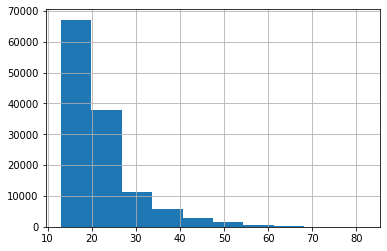

In [26]:
dados["NU_IDADE"].hist()

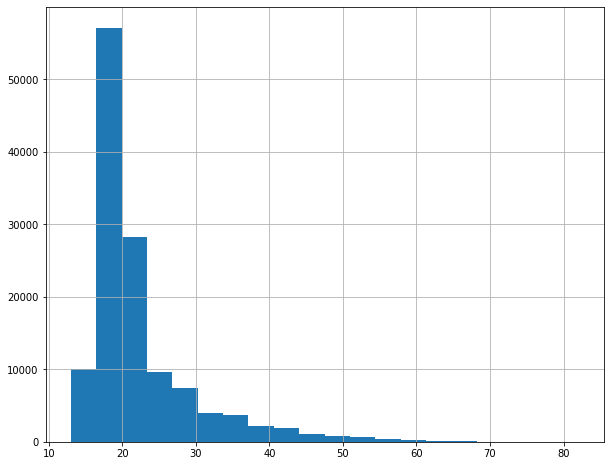

In [27]:
dados["NU_IDADE"].hist(bins = 20 , figsize = (10,8))

In [28]:
dados["IN_TREINEIRO"]

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [29]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

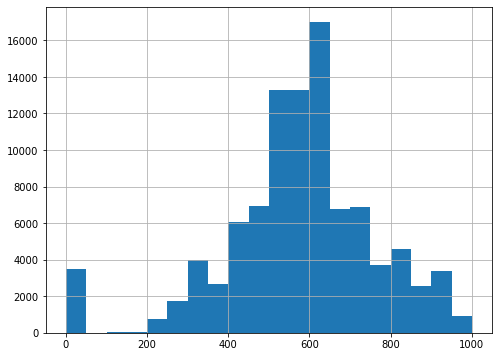

In [30]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize = (8,6))

In [31]:
dados["NU_NOTA_REDACAO"].mean()#media

571.5700253970197

In [32]:
dados["NU_NOTA_REDACAO"].std()#desvio padrão

188.07645455749753

In [33]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_MT    NU_NOTA_LC  NU_NOTA_REDACAO
count  92758.000000  98043.000000  92758.000000  98043.000000     98043.000000
mean     477.964015    507.365912    523.555206    520.463928       571.570025
std       76.296099     82.972839    109.416939     64.556578       188.076455
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      418.000000    447.900000    435.300000    483.700000       480.000000
50%      470.200000    510.900000    501.600000    526.100000       580.000000
75%      533.300000    567.100000    598.200000    565.100000       680.000000
max      797.300000    809.400000    985.000000    801.700000      1000.000000

In [34]:
dados["NU_NOTA_LC"].quantile(0.25)

483.7

In [35]:
dados["NU_NOTA_LC"].quantile(0.5)

526.1

In [36]:
dados["NU_NOTA_LC"].quantile(0.75)

565.1

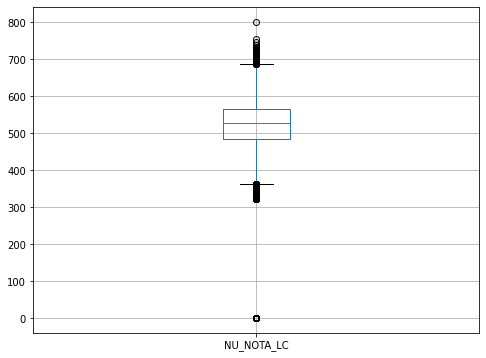

In [37]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

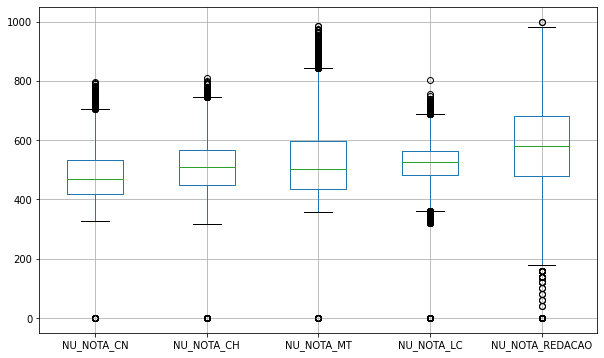

In [38]:
dados[provas].boxplot(grid = True , figsize = (10,6))

#Aula 1 - Desafios

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

##Desafio 1: Proporção dos inscritos por idade.

In [39]:
dados["NU_IDADE"].value_counts(normalize= True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

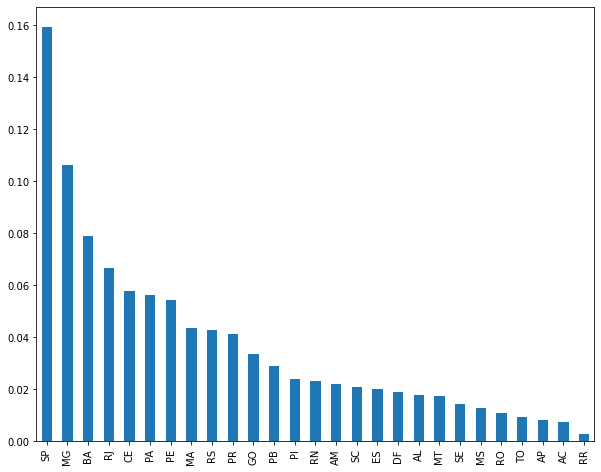

In [40]:
#dados["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))
dados["SG_UF_RESIDENCIA"].value_counts(normalize= True).plot.bar(figsize=(10,8))

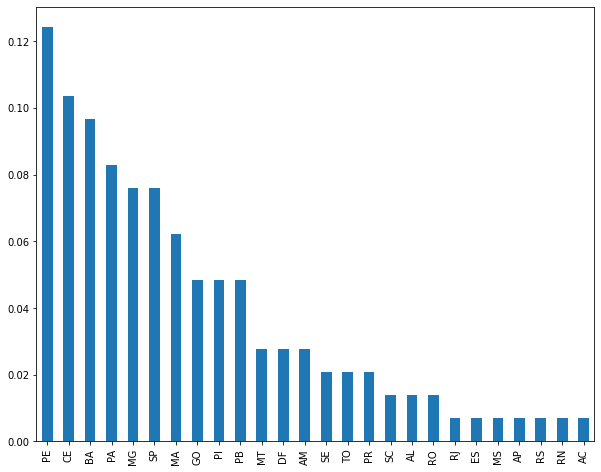

In [41]:
alunos_menor_quartoze = dados.query("NU_IDADE <=14")
#alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize= True).plot.bar(figsize=(10,8))

In [42]:
len(alunos_menor_quartoze)

145

##Desafio 2: Descobrir de quais estados são os inscritos com 13 anos.

In [43]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts().sort_index()

AP    1
BA    1
MT    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

In [44]:
estados_treze_anos =  dados[dados["NU_IDADE"] == 13]['SG_UF_RESIDENCIA'].value_counts().index.to_list()

print('Estados:', estados_treze_anos)

Estados: ['MT', 'BA', 'AP', 'SP']


In [45]:
dados.query("NU_IDADE == 13")

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
57359   190003297248    2019                  3504107  ...    B     B    B
95630   190004825557    2019                  5107602  ...    A     A    B
98197   190004926952    2019                  1600303  ...    A     B    B
116501  190005659236    2019                  2917508  ...    B     C    B

[4 rows x 136 columns]

In [46]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
GO     7
PI     7
PB     7
MT     4
DF     4
AM     4
SE     3
TO     3
PR     3
SC     2
AL     2
RO     2
RJ     1
ES     1
MS     1
AP     1
RS     1
RN     1
AC     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [47]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
GO     7
PI     7
PB     7
MT     4
DF     4
AM     4
SE     3
TO     3
PR     3
SC     2
AL     2
RO     2
RJ     1
ES     1
MS     1
AP     1
RS     1
RN     1
AC     1
Name: SG_UF_RESIDENCIA, dtype: int64

##Desafio 3: Adicionar título no gráfico


Text(0.5, 1.0, 'Histograma de idades')

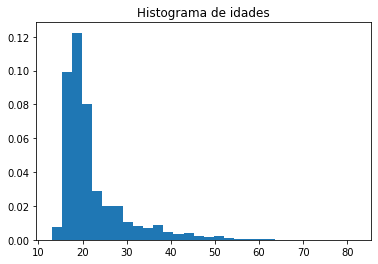

In [48]:
import matplotlib.pyplot as plt
#dados["NU_IDADE"].hist()
frequencia = plt.hist(dados["NU_IDADE"], 30,density=True )
plt.title("Histograma de idades")

In [49]:
idades_grafico = go.Figure()
idades_grafico.add_trace(go.Histogram(x = dados['NU_IDADE']))
idades_grafico.update_layout(
    title_text = 'Histograma de idades',
    xaxis_title_text = 'Idades',
    yaxis_title_text = 'Quantidade',
    template = 'plotly_white',
    bargap = .05,
    width = 500, 
    height = 500
)
idades_grafico.show()


#Gráfico abaixo não aparece no GitHub

##Desafio 4: Plotar os Histogramas das idades dos do treineiro e não treineiros.


In [50]:
dados["IN_TREINEIRO"].value_counts(normalize= True)

0    0.879094
1    0.120906
Name: IN_TREINEIRO, dtype: float64

Text(0.5, 1.0, 'Histograma de treineiros e não treineiros')

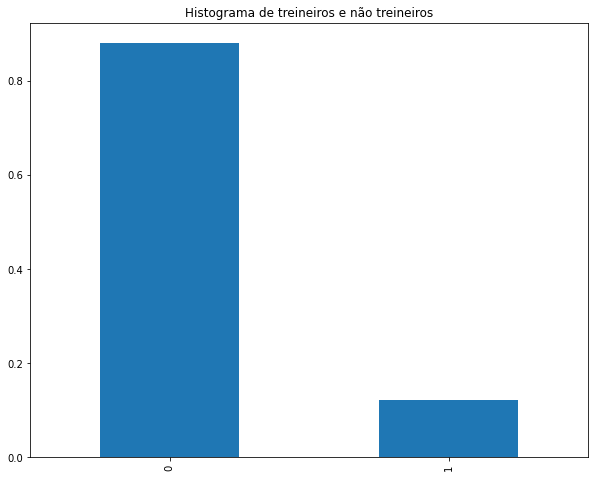

In [51]:
dados["IN_TREINEIRO"].value_counts(normalize= True).plot.bar(figsize=(10,8))
plt.title("Histograma de treineiros e não treineiros")

In [52]:
treineiros = dados[dados['IN_TREINEIRO'] == 1]
nao_treineiros = dados[dados['IN_TREINEIRO'] == 0]

idades_grafico = make_subplots(rows = 2,
                           cols = 1,
                           subplot_titles = ("Treineiros", 
                                             "Não Treineiros"))

idades_grafico.add_trace(go.Histogram(x = treineiros['NU_IDADE'],
                                  name = 'Treineiros',
                                  marker_color = '#d90bcf',
                                  showlegend = False),
                     row = 1, col = 1)

idades_grafico.add_trace(go.Histogram(x = nao_treineiros['NU_IDADE'],
                                  name = 'Não Treineiros',
                                  marker_color = '#68d90b',
                                  showlegend = False),
                     row = 2, col = 1)

idades_grafico.update_xaxes(title_text='Idade')

idades_grafico.update_yaxes(title_text='Quantidade')

idades_grafico.update_layout(
    title_text = 'Distribuição das idades',
    template = 'plotly_white',
    bargap = .05,
    width = 800, 
    height = 500
)

idades_grafico.show()

#Gráfico abaixo não aparece no GitHub


##Desafio 5: Comparar as distribuições das provas em inglês espanhol

In [53]:
dados["TP_LINGUA"].value_counts(normalize= True) 
#0 - inglês 
#1 - espanhol

1    0.524486
0    0.475514
Name: TP_LINGUA, dtype: float64

In [54]:
prova_ingles = dados[dados['TP_LINGUA'] == 0]
prova_espanhol = dados[dados['TP_LINGUA'] == 1]

nota_lc = make_subplots(rows = 1,
                           cols = 2,
                           shared_yaxes = True)

nota_lc.add_trace(go.Box(y = prova_ingles['NU_NOTA_LC'],
                             name = 'Inglês',
                             marker_color = '#32adcf',
                             showlegend = False),
                  row = 1, col = 1)

nota_lc.add_trace(go.Box(y = prova_espanhol['NU_NOTA_LC'],
                             name = 'Espanhol',
                             marker_color = '#d9d20b',
                             showlegend = False),
                     row = 1, col = 2)

nota_lc.update_layout(
    title_text = 'Distribuição de Notas de Linguagens e Códigos',
    yaxis_title_text = 'Nota de Linguagens e Códigos',
    template = 'plotly_white',
    bargap = .05,
    width = 500, 
    height = 500
)

nota_lc.show()


#Gráfico abaixo não aparece no GitHub



##Desafio 6: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [55]:
colors= ['#c56183', '#fadcaa']
labels = ['Espanhol', 'Inglês']

values = [len(prova_espanhol), 
          len(prova_ingles)]

idiomas = go.Figure()
idiomas.add_trace(go.Pie(labels=labels, values=values,
                            hole=.4, marker_colors=colors))

idiomas.update_layout(
    title_text='Idiomas - ENEM 2019',
    template = 'plotly_white',
    width = 800, 
    height = 500
)

idiomas.show()


#Gráfico abaixo não aparece no GitHub


#Aula 2 - Análise Exploratória

Text(0.5, 1.0, 'Boxplot das notas de matemática por renda')

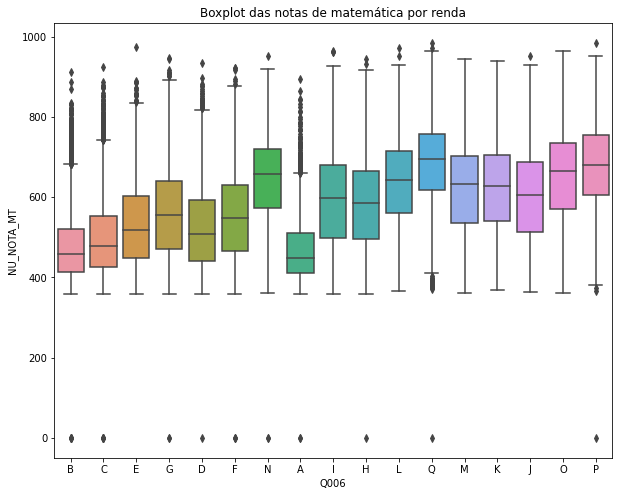

In [56]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de matemática por renda")

In [57]:
renda_ordenada = dados["Q006"].unique() #desordenado
renda_ordenada.sort() # não retorna
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática por renda - ordenado')

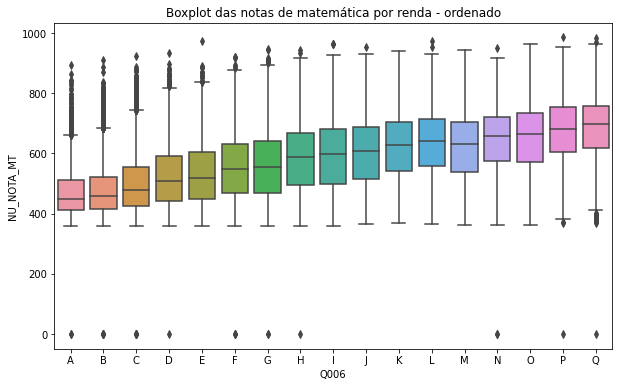

In [58]:
plt.figure(figsize = (10,6)) 
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order =renda_ordenada )
plt.title("Boxplot das notas de matemática por renda - ordenado")   
#Conforme a nota aumenta, diminui os outliers

In [59]:
dados[provas].sum() # soma as colunas

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [60]:
dados[provas].sum(axis = 1) #soma as linhas, ou seja as notas de cada um dos inscritos ( as que estão dentro de provas)


0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [61]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)#adidionei uma coluna nova com essa soma
dados.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q024  Q025 NU_NOTA_TOTAL
0  190001004661    2019                  1506138  ...    B     B        2288.9
1  190001004674    2019                  1504208  ...    A     B        1184.6
2  190001004722    2019                  1501402  ...    A     B        2350.5
3  190001004735    2019                  1507300  ...    A     B        2555.7
4  190001004776    2019                  1500800  ...    A     B        2803.5

[5 rows x 137 columns]

Text(0.5, 1.0, 'Boxplot das notas somadas - ordenado')

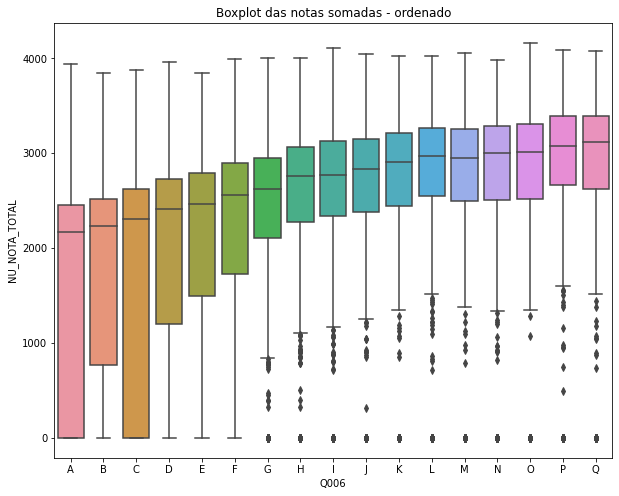

In [62]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order =renda_ordenada )
plt.title("Boxplot das notas somadas - ordenado")   
#Conforme a nota aumenta, diminui os outliers

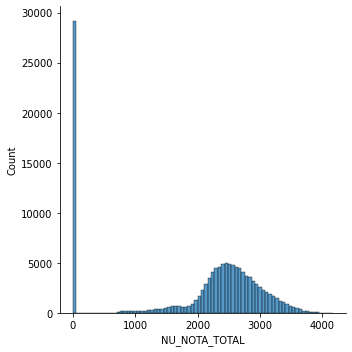

In [63]:
sns.displot(dados, x = "NU_NOTA_TOTAL")

In [64]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL== 0")

NU_NOTA_CN  NU_NOTA_CH  ...  NU_NOTA_REDACAO  NU_NOTA_TOTAL
10             NaN         NaN  ...              NaN            0.0
11             NaN         NaN  ...              NaN            0.0
26             NaN         NaN  ...              NaN            0.0
38             NaN         NaN  ...              NaN            0.0
40             NaN         NaN  ...              NaN            0.0
...            ...         ...  ...              ...            ...
127351         NaN         NaN  ...              NaN            0.0
127365         NaN         NaN  ...              NaN            0.0
127366         NaN         NaN  ...              NaN            0.0
127368         NaN         NaN  ...              NaN            0.0
127374         NaN         NaN  ...              NaN            0.0

[29162 rows x 6 columns]

In [65]:
#dados[provas].query("NU_NOTA_TOTAL !=0")

dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL !=0")
dados_sem_nota_zero.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q024  Q025 NU_NOTA_TOTAL
0  190001004661    2019                  1506138  ...    B     B        2288.9
1  190001004674    2019                  1504208  ...    A     B        1184.6
2  190001004722    2019                  1501402  ...    A     B        2350.5
3  190001004735    2019                  1507300  ...    A     B        2555.7
4  190001004776    2019                  1500800  ...    A     B        2803.5

[5 rows x 137 columns]

Text(0.5, 1.0, 'Boxplot das notas somadas - sem zero')

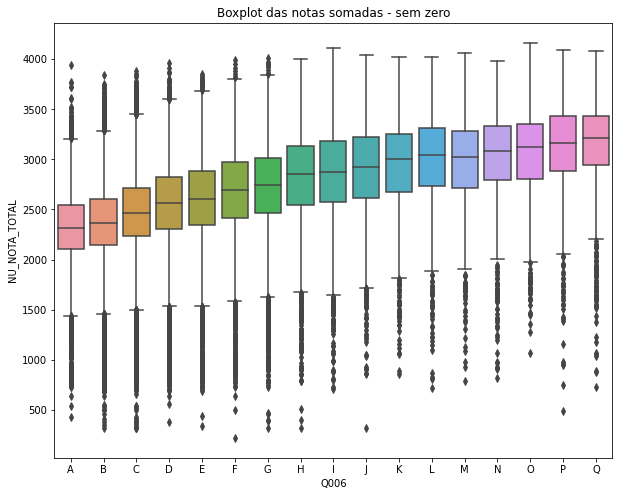

In [66]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_nota_zero, order =renda_ordenada )
plt.title("Boxplot das notas somadas - sem zero")   


Text(0.5, 1.0, 'Boxplot das notas somadas - sem zero')

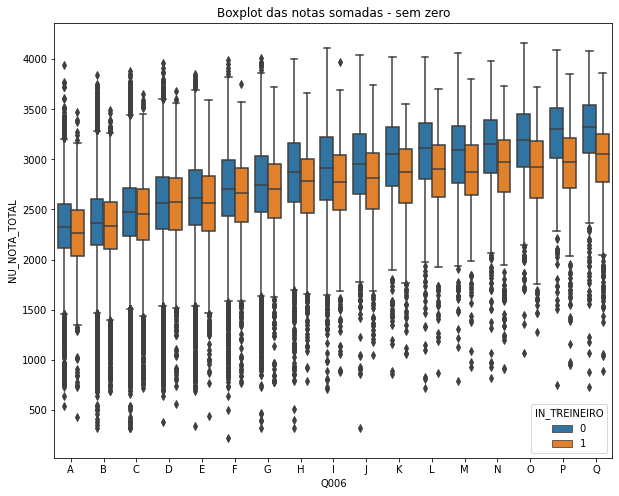

In [67]:
plt.figure(figsize = (10,8)) 
sns.boxplot(x="Q006", 
            y = "NU_NOTA_TOTAL", 
            data = dados_sem_nota_zero, 
            hue = "IN_TREINEIRO", 
            order =renda_ordenada )
plt.title("Boxplot das notas somadas - sem zero")   


#Aula 2 - Desafios

MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

##MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos


In [68]:
#Comentei para não ficar executando esse código 


#%precision %.2f
#pd.options.display.float_format = '{:,.2f}'.format


#from google.colab import drive
#drive.mount('/content/drive/')

#ano = "2019"
#fonte = f"/content/drive/My Drive/Colab Notebooks/Imersao-Alura/MICRODADOS_ENEM_{ano}.csv"




In [69]:
#chunks = []
#for chunk in pd.read_csv(
#                          fonte,
#                          low_memory=False,
#                          chunksize = 50000,
#                          encoding="ISO-8859-1",
#                          delimiter=";"):
#  chunk = chunk.query('NU_IDADE == 13 or NU_IDADE == 14')
#  chunks.append(chunk)  

#tabela13e14anos = pd.concat(chunks)

In [70]:
#destino = f"/content/drive/My Drive/Colab Notebooks/Imersao-Alura/MICRODADOS_ENEM_13_14.csv"

#tabela13e14anos.to_csv(destino,sep=';', index=False)


In [71]:
#tabela13e14anos

##Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.


In [72]:
dados.query("NU_IDADE <= 18")["SG_UF_RESIDENCIA"].value_counts()


SP    10913
MG     5516
CE     3515
BA     3479
RJ     3203
PE     2924
PR     2703
PA     2153
RS     2057
MA     2055
GO     1998
SC     1493
PB     1332
PI     1149
MT      978
ES      937
DF      861
AM      846
RN      835
AL      794
MS      691
SE      633
TO      541
RO      411
AP      318
AC      236
RR      121
Name: SG_UF_RESIDENCIA, dtype: int64

In [73]:
alunos_menor_idade = dados.query("NU_IDADE < 18")[["SG_UF_RESIDENCIA", "NU_IDADE"]].sort_values("NU_IDADE").reset_index()
alunos_menor_idade

index SG_UF_RESIDENCIA  NU_IDADE
0       95630               MT        13
1       98197               AP        13
2      116501               BA        13
3       57359               SP        13
4       97869               PR        14
...       ...              ...       ...
31235   49470               GO        17
31236   49467               GO        17
31237   49458               GO        17
31238   48853               PE        17
31239  127375               MG        17

[31240 rows x 3 columns]

In [74]:
alunos_por_estado = alunos_menor_idade.groupby(["SG_UF_RESIDENCIA"]).NU_IDADE.value_counts()
alunos_por_estado

SG_UF_RESIDENCIA  NU_IDADE
AC                17           72
                  16           30
                  15            6
                  14            1
AL                17          276
                             ... 
SP                13            1
TO                17          211
                  16           95
                  15           35
                  14            3
Name: NU_IDADE, Length: 110, dtype: int64

In [75]:
idade = alunos_menor_idade["NU_IDADE"].value_counts(normalize = True)
idade

17    0.680410
16    0.250640
15    0.064309
14    0.004513
13    0.000128
Name: NU_IDADE, dtype: float64

In [76]:
porcentagem_aluno_x_estado = alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True)
porcentagem_aluno_x_estado *=100
porcentagem_aluno_x_estado

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

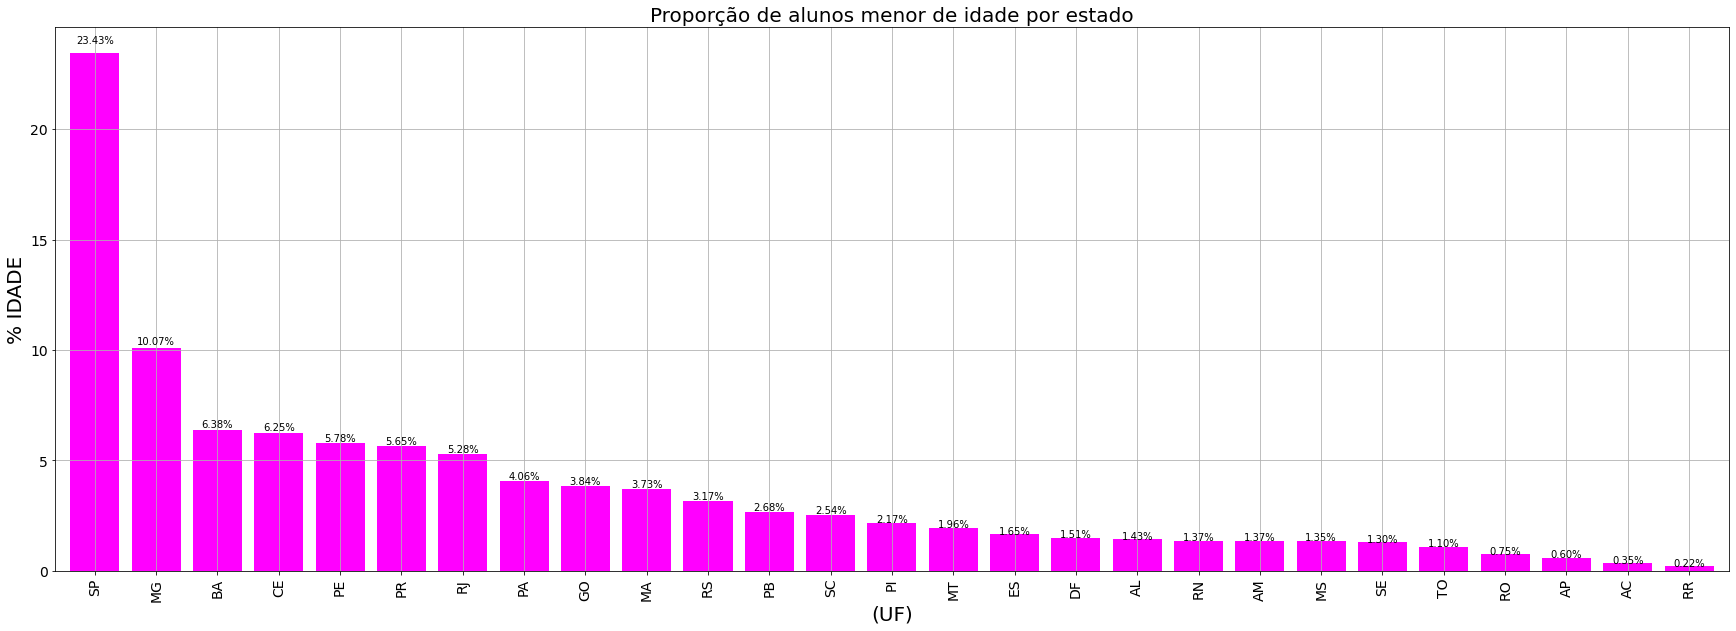

In [77]:
ax = porcentagem_aluno_x_estado.plot.bar(grid = True, stacked = True, width = 0.8,color = "magenta", figsize = (30,10), fontsize = 14, legend = False)

ax.set_xlabel('(UF)', size = 20)
ax.set_ylabel('% IDADE', size = 20)
plt.title('Proporção de alunos menor de idade por estado', size = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/100), (x + width/2, y + height*1.02), ha='center', fontsize= 10)

In [78]:
#Analise de menor de idade e que vai prestar a prova para valer 

dados_menor_idade_pra_valer = dados.query("(NU_IDADE < 18) & (IN_TREINEIRO == 0)")[["SG_UF_RESIDENCIA", "NU_IDADE"]].sort_values("NU_IDADE").reset_index()
dados_menor_idade_pra_valer



index SG_UF_RESIDENCIA  NU_IDADE
0       57359               SP        13
1      116501               BA        13
2       95630               MT        13
3       98197               AP        13
4       55157               PA        14
...       ...              ...       ...
17201   36843               SP        17
17202   36844               SP        17
17203   36849               SP        17
17204   36856               SP        17
17205  127375               MG        17

[17206 rows x 3 columns]

In [79]:
dados_menor_idade_pra_valer_x_estado = dados_menor_idade_pra_valer["SG_UF_RESIDENCIA"].value_counts(normalize = True)
dados_menor_idade_pra_valer_x_estado *=100
dados_menor_idade_pra_valer_x_estado

SP    29.454841
MG     8.555155
PR     6.474486
CE     5.904917
BA     5.689876
PE     5.405091
RJ     4.847146
MA     3.893990
PA     3.702197
GO     2.905963
PB     2.673486
RS     2.499128
SC     2.353830
PI     1.761014
DF     1.615715
MT     1.615715
AM     1.580844
ES     1.540160
AL     1.412298
MS     1.325119
RN     1.156573
SE     1.040335
TO     0.929908
AP     0.621876
RO     0.534697
AC     0.360339
RR     0.145298
Name: SG_UF_RESIDENCIA, dtype: float64

##Desafio 3: Criar uma função para plotar o boxplot do seaborn


In [80]:
def fn_boxplot(e_x,e_y,d,h,o, t):

  '''
  Explicar os parâmetros
  '''
  plt.figure(figsize = (10,8)) 
  sns.boxplot(x=e_x, y = e_y, data = d,  hue = h, order =o )
  plt.title(t)   


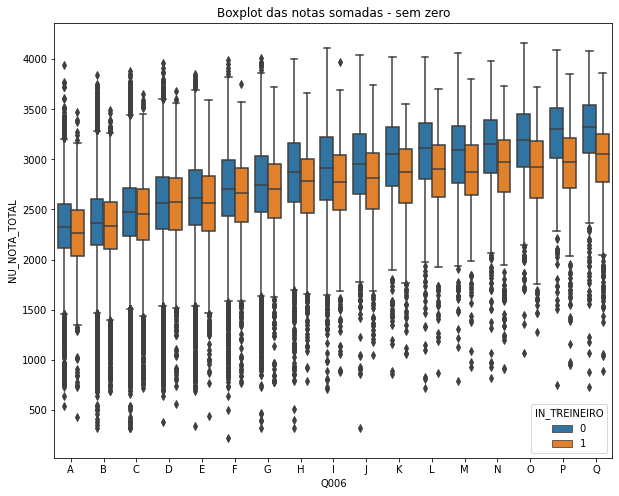

In [81]:
fn_boxplot("Q006", "NU_NOTA_TOTAL",dados_sem_nota_zero,"IN_TREINEIRO",renda_ordenada,"Boxplot das notas somadas - sem zero" )


##Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente


In [82]:
presenca = ["TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_MT"]
dados[presenca]

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0                    1               1               1               1
1                    0               1               1               0
2                    1               1               1               1
3                    1               1               1               1
4                    1               1               1               1
...                ...             ...             ...             ...
127375               1               1               1               1
127376               1               1               1               1
127377               0               1               1               0
127378               1               1               1               1
127379               1               1               1               1

[127380 rows x 4 columns]

In [83]:
provas = provas + presenca

In [84]:
dados[provas]

NU_NOTA_CN  NU_NOTA_CH  ...  TP_PRESENCA_LC  TP_PRESENCA_MT
0            435.6       512.3  ...               1               1
1              NaN       409.3  ...               1               0
2            423.2       499.1  ...               1               1
3            426.2       578.1  ...               1               1
4            516.5       571.3  ...               1               1
...            ...         ...  ...             ...             ...
127375       502.4       559.6  ...               1               1
127376       449.1       380.9  ...               1               1
127377         NaN       516.0  ...               1               0
127378       564.7       416.2  ...               1               1
127379       466.7       425.5  ...               1               1

[127380 rows x 10 columns]

In [85]:
dados[provas].query("NU_NOTA_TOTAL == 0")


NU_NOTA_CN  NU_NOTA_CH  ...  TP_PRESENCA_LC  TP_PRESENCA_MT
10             NaN         NaN  ...               0               0
11             NaN         NaN  ...               0               0
26             NaN         NaN  ...               0               0
38             NaN         NaN  ...               0               0
40             NaN         NaN  ...               0               0
...            ...         ...  ...             ...             ...
127351         NaN         NaN  ...               0               0
127365         NaN         NaN  ...               0               0
127366         NaN         NaN  ...               0               0
127368         NaN         NaN  ...               0               0
127374         NaN         NaN  ...               0               0

[29162 rows x 10 columns]

In [86]:
#Relembrando:Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
##Analise dos eliminados
alunos_com_nota_zero = dados[provas].query("NU_NOTA_TOTAL == 0")
alunos_com_nota_zero

NU_NOTA_CN  NU_NOTA_CH  ...  TP_PRESENCA_LC  TP_PRESENCA_MT
10             NaN         NaN  ...               0               0
11             NaN         NaN  ...               0               0
26             NaN         NaN  ...               0               0
38             NaN         NaN  ...               0               0
40             NaN         NaN  ...               0               0
...            ...         ...  ...             ...             ...
127351         NaN         NaN  ...               0               0
127365         NaN         NaN  ...               0               0
127366         NaN         NaN  ...               0               0
127368         NaN         NaN  ...               0               0
127374         NaN         NaN  ...               0               0

[29162 rows x 10 columns]

In [87]:
alunos_com_nota_zero

NU_NOTA_CN  NU_NOTA_CH  ...  TP_PRESENCA_LC  TP_PRESENCA_MT
10             NaN         NaN  ...               0               0
11             NaN         NaN  ...               0               0
26             NaN         NaN  ...               0               0
38             NaN         NaN  ...               0               0
40             NaN         NaN  ...               0               0
...            ...         ...  ...             ...             ...
127351         NaN         NaN  ...               0               0
127365         NaN         NaN  ...               0               0
127366         NaN         NaN  ...               0               0
127368         NaN         NaN  ...               0               0
127374         NaN         NaN  ...               0               0

[29162 rows x 10 columns]

In [88]:
#dados[provas].query("TP_PRESENCA_CN ==2")
alunos_total_zero_e_eliminados = dados.query("(NU_NOTA_TOTAL == 0) & ((TP_PRESENCA_CN ==2)| (TP_PRESENCA_CH ==2)| (TP_PRESENCA_LC ==2)| (TP_PRESENCA_MT ==2))")[["SG_UF_RESIDENCIA", "NU_IDADE",  "IN_TREINEIRO", "Q006"]].sort_values("NU_IDADE").reset_index()

In [89]:
alunos_total_zero_e_eliminados

index SG_UF_RESIDENCIA  NU_IDADE  IN_TREINEIRO Q006
0    112653               ES        15             1    J
1     21389               PR        16             1    G
2     71221               SC        16             1    G
3     28374               BA        16             1    A
4     96968               MT        16             1    J
..      ...              ...       ...           ...  ...
115     446               PA        35             0    C
116   79649               MG        36             0    C
117   83011               PA        37             0    F
118   54297               RJ        48             0    C
119  126769               DF        50             0    M

[120 rows x 5 columns]

In [90]:
total_alunos_total_zero_e_eliminados= len(alunos_total_zero_e_eliminados["index"].unique())


In [91]:
total_alunos_total_zero_e_eliminados

120

In [92]:
alunos_total_zero_e_faltantes = dados.query("((NU_NOTA_TOTAL == 0) & ((TP_PRESENCA_CN ==0)| (TP_PRESENCA_CH ==0)| (TP_PRESENCA_LC ==0)| (TP_PRESENCA_MT ==0)))")[["SG_UF_RESIDENCIA", "NU_IDADE",  "IN_TREINEIRO", "Q006"]].sort_values("NU_IDADE").reset_index()

In [93]:
alunos_total_zero_e_faltantes

index SG_UF_RESIDENCIA  NU_IDADE  IN_TREINEIRO Q006
0       98197               AP        13             0    K
1       95630               MT        13             0    F
2       86181               AL        14             1    G
3      118990               MG        14             0    E
4       44206               PE        14             0    Q
...       ...              ...       ...           ...  ...
29155   34302               MG        71             0    L
29156   95144               RJ        72             0    E
29157  107247               BA        76             0    Q
29158   84937               RJ        77             0    L
29159   85002               RJ        82             0    P

[29160 rows x 5 columns]

In [94]:
total_alunos_total_zero_e_faltantes = len(alunos_total_zero_e_faltantes["index"].unique())



In [95]:
total_alunos_total_zero_e_faltantes

29160

In [96]:
conj = []

In [97]:
conj.append(total_alunos_total_zero_e_faltantes)

In [98]:
conj.append(total_alunos_total_zero_e_eliminados)

In [99]:
conj

[29160, 120]

In [100]:
dados['CLASSIFICACAO'] = 'NaN'


In [101]:
dados

NU_INSCRICAO  NU_ANO  ...  NU_NOTA_TOTAL CLASSIFICACAO
0       190001004661    2019  ...         2288.9           NaN
1       190001004674    2019  ...         1184.6           NaN
2       190001004722    2019  ...         2350.5           NaN
3       190001004735    2019  ...         2555.7           NaN
4       190001004776    2019  ...         2803.5           NaN
...              ...     ...  ...            ...           ...
127375  190006120035    2019  ...         2867.4           NaN
127376  190006120036    2019  ...         2218.5           NaN
127377  190006120037    2019  ...         1453.9           NaN
127378  190006120060    2019  ...         2573.9           NaN
127379  190006120170    2019  ...         2287.8           NaN

[127380 rows x 138 columns]

In [102]:
dados.query("(NU_NOTA_TOTAL == 0) & ((TP_PRESENCA_CN ==2)| (TP_PRESENCA_CH ==2)| (TP_PRESENCA_LC ==2)| (TP_PRESENCA_MT ==2))")

NU_INSCRICAO  NU_ANO  ...  NU_NOTA_TOTAL CLASSIFICACAO
77      190001007653    2019  ...            0.0           NaN
396     190001019972    2019  ...            0.0           NaN
446     190001021386    2019  ...            0.0           NaN
609     190001027857    2019  ...            0.0           NaN
728     190001032370    2019  ...            0.0           NaN
...              ...     ...  ...            ...           ...
124695  190005993865    2019  ...            0.0           NaN
125216  190006013982    2019  ...            0.0           NaN
125784  190006036888    2019  ...            0.0           NaN
126769  190006076247    2019  ...            0.0           NaN
127122  190006105913    2019  ...            0.0           NaN

[120 rows x 138 columns]

In [103]:
dados.loc[dados['NU_NOTA_TOTAL'] == 0, 'CLASSIFICACAO'] = 'ZEROU' 

In [104]:
dados.loc[dados['NU_NOTA_TOTAL'] != 0, 'CLASSIFICACAO'] = 'NÃO ZEROU' 

In [105]:
dados.loc[((dados['NU_NOTA_TOTAL'] == 0) & ((dados['TP_PRESENCA_CN'] == 0) | (dados['TP_PRESENCA_CH'] == 0) | (dados['TP_PRESENCA_LC'] == 0) | (dados['TP_PRESENCA_MT'] == 0))), 'CLASSIFICACAO'] = 'ZEROU E FALTOU' 


In [106]:
dados.loc[((dados['NU_NOTA_TOTAL'] == 0) & ((dados['TP_PRESENCA_CN'] == 2) | (dados['TP_PRESENCA_CH'] == 2) | (dados['TP_PRESENCA_LC'] == 2) | (dados['TP_PRESENCA_MT'] == 2))), 'CLASSIFICACAO'] = 'ZEROU E ELIMINADO' 


In [107]:
dados.loc[((dados['NU_NOTA_TOTAL'] != 0) & ((dados['TP_PRESENCA_CN'] == 2) | (dados['TP_PRESENCA_CH'] == 2) | (dados['TP_PRESENCA_LC'] == 2) | (dados['TP_PRESENCA_MT'] == 2))), 'CLASSIFICACAO'] = 'NÃO ZEROU E ELIMINADO' 


In [108]:
dados.query("CLASSIFICACAO == 'ZEROU E FALTOU'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE"]].sort_values("NU_IDADE").reset_index()


index   CLASSIFICACAO  ...  TP_PRESENCA_MT  NU_IDADE
0       95630  ZEROU E FALTOU  ...               0        13
1       98197  ZEROU E FALTOU  ...               0        13
2        5748  ZEROU E FALTOU  ...               0        14
3      100939  ZEROU E FALTOU  ...               0        14
4       23289  ZEROU E FALTOU  ...               0        14
...       ...             ...  ...             ...       ...
29035   34302  ZEROU E FALTOU  ...               0        71
29036   95144  ZEROU E FALTOU  ...               0        72
29037  107247  ZEROU E FALTOU  ...               0        76
29038   84937  ZEROU E FALTOU  ...               0        77
29039   85002  ZEROU E FALTOU  ...               0        82

[29040 rows x 8 columns]

In [109]:
dados.query("CLASSIFICACAO == 'ZEROU E ELIMINADO'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE"]].sort_values("NU_IDADE").reset_index()


index      CLASSIFICACAO  ...  TP_PRESENCA_MT  NU_IDADE
0    112653  ZEROU E ELIMINADO  ...               0        15
1     21389  ZEROU E ELIMINADO  ...               0        16
2     71221  ZEROU E ELIMINADO  ...               0        16
3     28374  ZEROU E ELIMINADO  ...               0        16
4     96968  ZEROU E ELIMINADO  ...               0        16
..      ...                ...  ...             ...       ...
115     446  ZEROU E ELIMINADO  ...               0        35
116   79649  ZEROU E ELIMINADO  ...               0        36
117   83011  ZEROU E ELIMINADO  ...               0        37
118   54297  ZEROU E ELIMINADO  ...               0        48
119  126769  ZEROU E ELIMINADO  ...               0        50

[120 rows x 8 columns]

In [110]:
dados.query("CLASSIFICACAO == 'NÃO ZEROU E ELIMINADO'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE"]].sort_values("NU_IDADE").reset_index()


index          CLASSIFICACAO  ...  TP_PRESENCA_MT  NU_IDADE
0    63870  NÃO ZEROU E ELIMINADO  ...               2        15
1   120233  NÃO ZEROU E ELIMINADO  ...               2        15
2    44747  NÃO ZEROU E ELIMINADO  ...               2        16
3    40005  NÃO ZEROU E ELIMINADO  ...               1        16
4   106091  NÃO ZEROU E ELIMINADO  ...               1        16
5    95701  NÃO ZEROU E ELIMINADO  ...               2        17
6    80839  NÃO ZEROU E ELIMINADO  ...               2        17
7    76027  NÃO ZEROU E ELIMINADO  ...               2        17
8    60225  NÃO ZEROU E ELIMINADO  ...               2        17
9    59430  NÃO ZEROU E ELIMINADO  ...               1        17
10   49842  NÃO ZEROU E ELIMINADO  ...               2        17
11   92473  NÃO ZEROU E ELIMINADO  ...               2        17
12   24936  NÃO ZEROU E ELIMINADO  ...               2        17
13  119045  NÃO ZEROU E ELIMINADO  ...               2        17
14   16756  NÃO ZEROU E ELIMINADO  ...               2        17
15  110289  NÃO ZEROU E ELIMINADO  ...               2        18
16   87789  NÃO ZEROU E ELIMINADO  ...               2        18
17   84423  NÃO ZEROU E ELIMINADO  ...               2        18
18    3411  NÃO ZEROU E ELIMINADO  ...               2        18
19   27360  NÃO ZEROU E ELIMINADO  ...               2        18
20   61847  NÃO ZEROU E ELIMINADO  ...               2        18
21  114896  NÃO ZEROU E ELIMINADO  ...               2        18
22  100003  NÃO ZEROU E ELIMINADO  ...               2        18
23   56242  NÃO ZEROU E ELIMINADO  ...               2        18
24   36047  NÃO ZEROU E ELIMINADO  ...               2        18
25   17211  NÃO ZEROU E ELIMINADO  ...               1        18
26   17035  NÃO ZEROU E ELIMINADO  ...               2        18
27   98816  NÃO ZEROU E ELIMINADO  ...               2        19
28   47088  NÃO ZEROU E ELIMINADO  ...               2        19
29   58061  NÃO ZEROU E ELIMINADO  ...               2        19
30   71474  NÃO ZEROU E ELIMINADO  ...               2        19
31   93997  NÃO ZEROU E ELIMINADO  ...               2        19
32   66579  NÃO ZEROU E ELIMINADO  ...               2        19
33   60392  NÃO ZEROU E ELIMINADO  ...               1        19
34  117935  NÃO ZEROU E ELIMINADO  ...               2        19
35   77304  NÃO ZEROU E ELIMINADO  ...               2        20
36  122716  NÃO ZEROU E ELIMINADO  ...               2        20
37   87083  NÃO ZEROU E ELIMINADO  ...               2        20
38   87463  NÃO ZEROU E ELIMINADO  ...               2        20
39   71675  NÃO ZEROU E ELIMINADO  ...               2        21
40   50943  NÃO ZEROU E ELIMINADO  ...               2        21
41   43694  NÃO ZEROU E ELIMINADO  ...               2        21
42   55229  NÃO ZEROU E ELIMINADO  ...               2        21
43   68397  NÃO ZEROU E ELIMINADO  ...               2        21
44    1784  NÃO ZEROU E ELIMINADO  ...               2        22
45   91603  NÃO ZEROU E ELIMINADO  ...               2        22
46    3839  NÃO ZEROU E ELIMINADO  ...               1        22
47   15619  NÃO ZEROU E ELIMINADO  ...               2        23
48   82582  NÃO ZEROU E ELIMINADO  ...               2        25
49   81387  NÃO ZEROU E ELIMINADO  ...               2        25
50   97725  NÃO ZEROU E ELIMINADO  ...               2        29
51    5970  NÃO ZEROU E ELIMINADO  ...               2        33
52    2867  NÃO ZEROU E ELIMINADO  ...               2        33
53   93482  NÃO ZEROU E ELIMINADO  ...               2        37
54   63315  NÃO ZEROU E ELIMINADO  ...               2        38
55   25454  NÃO ZEROU E ELIMINADO  ...               2        38
56  125503  NÃO ZEROU E ELIMINADO  ...               2        42
57   30042  NÃO ZEROU E ELIMINADO  ...               2        53

[58 rows x 8 columns]

Conclusão que quem foi eliminado em um dia nem foi no outro equivalente a 120 alunos
Tivemos 58 alunos que não zeraram mas foram eliminados no segundo dia

In [111]:
conj

[29160, 120]

In [112]:
classif = dados["CLASSIFICACAO"].value_counts()

In [113]:
classif

NÃO ZEROU                98160
ZEROU E FALTOU           29040
ZEROU E ELIMINADO          120
NÃO ZEROU E ELIMINADO       58
ZEROU                        2
Name: CLASSIFICACAO, dtype: int64

In [114]:
dados.query("CLASSIFICACAO == 'ZEROU'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE"]]

CLASSIFICACAO  NU_NOTA_TOTAL  ...  TP_PRESENCA_MT  NU_IDADE
8693           ZEROU            0.0  ...               1        44
101269         ZEROU            0.0  ...               1        24

[2 rows x 7 columns]

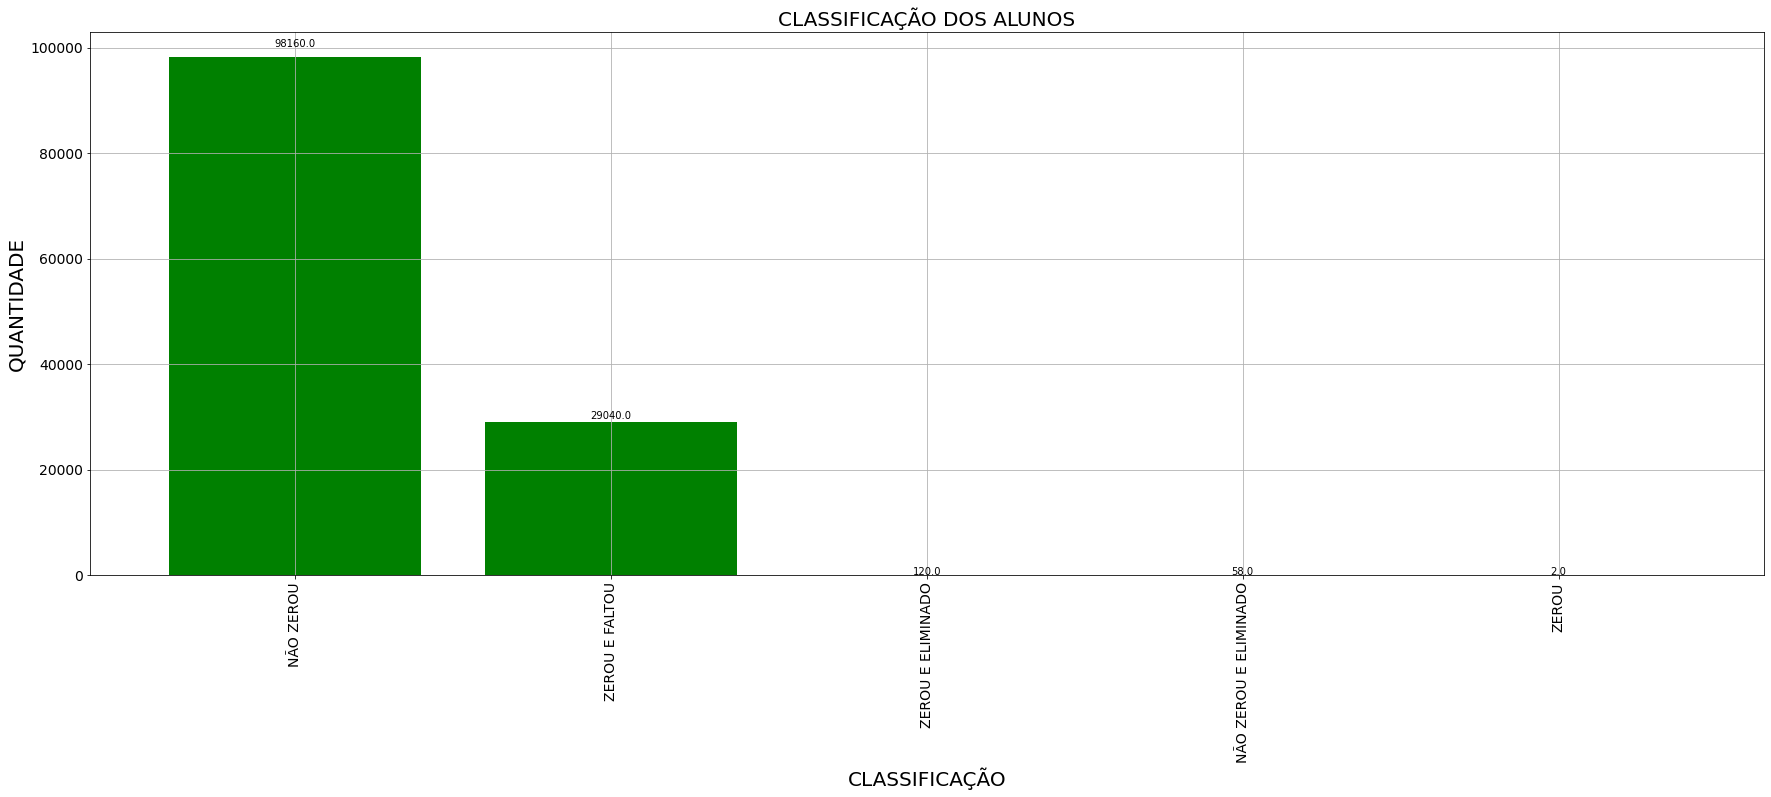

In [115]:
ax = classif.plot.bar(grid = True, stacked = True, width = 0.8,color = "green", figsize = (30,10), fontsize = 14, legend = False)

ax.set_xlabel('CLASSIFICAÇÃO', size = 20)
ax.set_ylabel('QUANTIDADE', size = 20)
plt.title('CLASSIFICAÇÃO DOS ALUNOS', size = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(height, (x + width/2, y + height*1.02), ha='center', fontsize= 10)

In [116]:
classif_porcentagem = dados["CLASSIFICACAO"].value_counts(normalize = True)
classif_porcentagem *=100
classif_porcentagem

NÃO ZEROU                77.060763
ZEROU E FALTOU           22.797927
ZEROU E ELIMINADO         0.094206
NÃO ZEROU E ELIMINADO     0.045533
ZEROU                     0.001570
Name: CLASSIFICACAO, dtype: float64

##Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [117]:
dados.query("CLASSIFICACAO == 'ZEROU E ELIMINADO'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]]


CLASSIFICACAO  NU_NOTA_TOTAL  ...  NU_NOTA_LC  NU_NOTA_REDACAO
77      ZEROU E ELIMINADO            0.0  ...         NaN              NaN
396     ZEROU E ELIMINADO            0.0  ...         NaN              NaN
446     ZEROU E ELIMINADO            0.0  ...         NaN              NaN
609     ZEROU E ELIMINADO            0.0  ...         NaN              NaN
728     ZEROU E ELIMINADO            0.0  ...         NaN              NaN
...                   ...            ...  ...         ...              ...
124695  ZEROU E ELIMINADO            0.0  ...         NaN              NaN
125216  ZEROU E ELIMINADO            0.0  ...         NaN              NaN
125784  ZEROU E ELIMINADO            0.0  ...         NaN              NaN
126769  ZEROU E ELIMINADO            0.0  ...         NaN              NaN
127122  ZEROU E ELIMINADO            0.0  ...         NaN              NaN

[120 rows x 12 columns]

In [118]:
dados.query("CLASSIFICACAO == 'NÃO ZEROU E ELIMINADO'")[["CLASSIFICACAO", "NU_NOTA_TOTAL","TP_PRESENCA_CH", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT","NU_IDADE", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]]


CLASSIFICACAO  NU_NOTA_TOTAL  ...  NU_NOTA_LC  NU_NOTA_REDACAO
1784    NÃO ZEROU E ELIMINADO         1488.4  ...       485.0            680.0
2867    NÃO ZEROU E ELIMINADO         1473.2  ...       526.6            480.0
3411    NÃO ZEROU E ELIMINADO         1327.6  ...       484.9            340.0
3839    NÃO ZEROU E ELIMINADO          879.2  ...         NaN              NaN
5970    NÃO ZEROU E ELIMINADO         1280.4  ...       471.8            360.0
15619   NÃO ZEROU E ELIMINADO         2039.4  ...       620.7            800.0
16756   NÃO ZEROU E ELIMINADO         2072.6  ...       609.7            860.0
17035   NÃO ZEROU E ELIMINADO          833.6  ...       396.3              0.0
17211   NÃO ZEROU E ELIMINADO          744.7  ...         NaN              NaN
24936   NÃO ZEROU E ELIMINADO         1669.2  ...       584.3            520.0
25454   NÃO ZEROU E ELIMINADO         1978.9  ...       575.5            760.0
27360   NÃO ZEROU E ELIMINADO         1753.0  ...       574.7            620.0
30042   NÃO ZEROU E ELIMINADO          923.8  ...       443.0              0.0
36047   NÃO ZEROU E ELIMINADO         1451.9  ...       476.4            500.0
40005   NÃO ZEROU E ELIMINADO          849.4  ...         NaN              NaN
43694   NÃO ZEROU E ELIMINADO         1583.5  ...       585.7            620.0
44747   NÃO ZEROU E ELIMINADO         1988.5  ...       610.9            760.0
47088   NÃO ZEROU E ELIMINADO         1887.3  ...       568.8            700.0
49842   NÃO ZEROU E ELIMINADO         1935.7  ...       596.2            760.0
50943   NÃO ZEROU E ELIMINADO         1876.2  ...       547.9            780.0
55229   NÃO ZEROU E ELIMINADO         1591.4  ...       532.0            500.0
56242   NÃO ZEROU E ELIMINADO          761.9  ...       367.9              0.0
58061   NÃO ZEROU E ELIMINADO         1117.0  ...       456.9            300.0
59430   NÃO ZEROU E ELIMINADO         1007.8  ...         NaN              NaN
60225   NÃO ZEROU E ELIMINADO         1669.0  ...       488.3            620.0
60392   NÃO ZEROU E ELIMINADO         1384.7  ...         NaN              NaN
61847   NÃO ZEROU E ELIMINADO         1659.5  ...       519.4            660.0
63315   NÃO ZEROU E ELIMINADO         1430.3  ...       534.2            380.0
63870   NÃO ZEROU E ELIMINADO         1871.6  ...       556.6            720.0
66579   NÃO ZEROU E ELIMINADO         1364.6  ...       510.4            460.0
68397   NÃO ZEROU E ELIMINADO         1432.1  ...       526.1            340.0
71474   NÃO ZEROU E ELIMINADO         1319.8  ...       482.4            320.0
71675   NÃO ZEROU E ELIMINADO         1556.7  ...       543.9            560.0
76027   NÃO ZEROU E ELIMINADO         1428.9  ...       553.8            400.0
77304   NÃO ZEROU E ELIMINADO         1513.3  ...       458.9            600.0
80839   NÃO ZEROU E ELIMINADO         1512.8  ...       507.6            580.0
81387   NÃO ZEROU E ELIMINADO         1439.3  ...       578.3            300.0
82582   NÃO ZEROU E ELIMINADO          992.9  ...       365.6            240.0
84423   NÃO ZEROU E ELIMINADO         1714.7  ...       541.2            600.0
87083   NÃO ZEROU E ELIMINADO         1625.0  ...       534.0            580.0
87463   NÃO ZEROU E ELIMINADO         1248.1  ...       350.2            460.0
87789   NÃO ZEROU E ELIMINADO         1482.9  ...       464.4            520.0
91603   NÃO ZEROU E ELIMINADO         1409.1  ...       504.0            440.0
92473   NÃO ZEROU E ELIMINADO          400.0  ...         0.0            400.0
93482   NÃO ZEROU E ELIMINADO          322.6  ...       322.6              0.0
93997   NÃO ZEROU E ELIMINADO         1320.5  ...       430.2            480.0
95701   NÃO ZEROU E ELIMINADO         1325.6  ...       459.1            460.0
97725   NÃO ZEROU E ELIMINADO         1733.4  ...       486.4            800.0
98816   NÃO ZEROU E ELIMINADO         1556.9  ...       501.5            500.0
100003  NÃO ZEROU E ELIMINADO         1875.3  ...       493.6     

##Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

In [119]:
treino_renda=dados[["Q006", "IN_TREINEIRO"]].value_counts(normalize = True)


In [120]:
treino_renda

Q006  IN_TREINEIRO
C     0               0.235728
B     0               0.225805
D     0               0.089151
E     0               0.083184
G     0               0.050793
A     0               0.041168
F     0               0.037565
H     0               0.030232
B     1               0.023764
I     0               0.022288
C     1               0.020152
J     0               0.012781
E     1               0.009947
D     1               0.009413
K     0               0.008950
N     0               0.008612
G     1               0.008298
H     1               0.007576
O     0               0.007364
Q     0               0.007191
F     1               0.006712
L     0               0.006257
M     0               0.006123
P     0               0.005904
I     1               0.005597
A     1               0.004679
Q     1               0.004082
J     1               0.003698
N     1               0.003423
O     1               0.003054
P     1               0.002983
K     1             

In [121]:
type(treino_renda)

pandas.core.series.Series

In [122]:
treino_renda_frame=treino_renda.to_frame().reset_index()

In [123]:
treino_renda_frame

Q006  IN_TREINEIRO         0
0     C             0  0.235728
1     B             0  0.225805
2     D             0  0.089151
3     E             0  0.083184
4     G             0  0.050793
5     A             0  0.041168
6     F             0  0.037565
7     H             0  0.030232
8     B             1  0.023764
9     I             0  0.022288
10    C             1  0.020152
11    J             0  0.012781
12    E             1  0.009947
13    D             1  0.009413
14    K             0  0.008950
15    N             0  0.008612
16    G             1  0.008298
17    H             1  0.007576
18    O             0  0.007364
19    Q             0  0.007191
20    F             1  0.006712
21    L             0  0.006257
22    M             0  0.006123
23    P             0  0.005904
24    I             1  0.005597
25    A             1  0.004679
26    Q             1  0.004082
27    J             1  0.003698
28    N             1  0.003423
29    O             1  0.003054
30    P             1  0.002983
31    K             1  0.002685
32    M             1  0.002434
33    L             1  0.002410

In [124]:
type(treino_renda_frame)

pandas.core.frame.DataFrame

In [125]:
treino_renda_frame

Q006  IN_TREINEIRO         0
0     C             0  0.235728
1     B             0  0.225805
2     D             0  0.089151
3     E             0  0.083184
4     G             0  0.050793
5     A             0  0.041168
6     F             0  0.037565
7     H             0  0.030232
8     B             1  0.023764
9     I             0  0.022288
10    C             1  0.020152
11    J             0  0.012781
12    E             1  0.009947
13    D             1  0.009413
14    K             0  0.008950
15    N             0  0.008612
16    G             1  0.008298
17    H             1  0.007576
18    O             0  0.007364
19    Q             0  0.007191
20    F             1  0.006712
21    L             0  0.006257
22    M             0  0.006123
23    P             0  0.005904
24    I             1  0.005597
25    A             1  0.004679
26    Q             1  0.004082
27    J             1  0.003698
28    N             1  0.003423
29    O             1  0.003054
30    P             1  0.002983
31    K             1  0.002685
32    M             1  0.002434
33    L             1  0.002410

In [126]:
mapping = {treino_renda_frame.columns[0]:'total'}
treino_renda_frame = treino_renda_frame.rename(columns=mapping) 
#treino_renda_frame = treino_renda_frame.rename(columns={treino_renda_frame.columns[0]: 'total'})

In [127]:
treino_renda_frame

total  IN_TREINEIRO         0
0      C             0  0.235728
1      B             0  0.225805
2      D             0  0.089151
3      E             0  0.083184
4      G             0  0.050793
5      A             0  0.041168
6      F             0  0.037565
7      H             0  0.030232
8      B             1  0.023764
9      I             0  0.022288
10     C             1  0.020152
11     J             0  0.012781
12     E             1  0.009947
13     D             1  0.009413
14     K             0  0.008950
15     N             0  0.008612
16     G             1  0.008298
17     H             1  0.007576
18     O             0  0.007364
19     Q             0  0.007191
20     F             1  0.006712
21     L             0  0.006257
22     M             0  0.006123
23     P             0  0.005904
24     I             1  0.005597
25     A             1  0.004679
26     Q             1  0.004082
27     J             1  0.003698
28     N             1  0.003423
29     O             1  0.003054
30     P             1  0.002983
31     K             1  0.002685
32     M             1  0.002434
33     L             1  0.002410

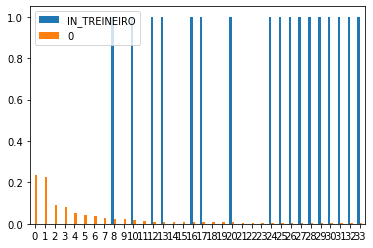

In [128]:
ax = treino_renda_frame.plot.bar(rot=0)

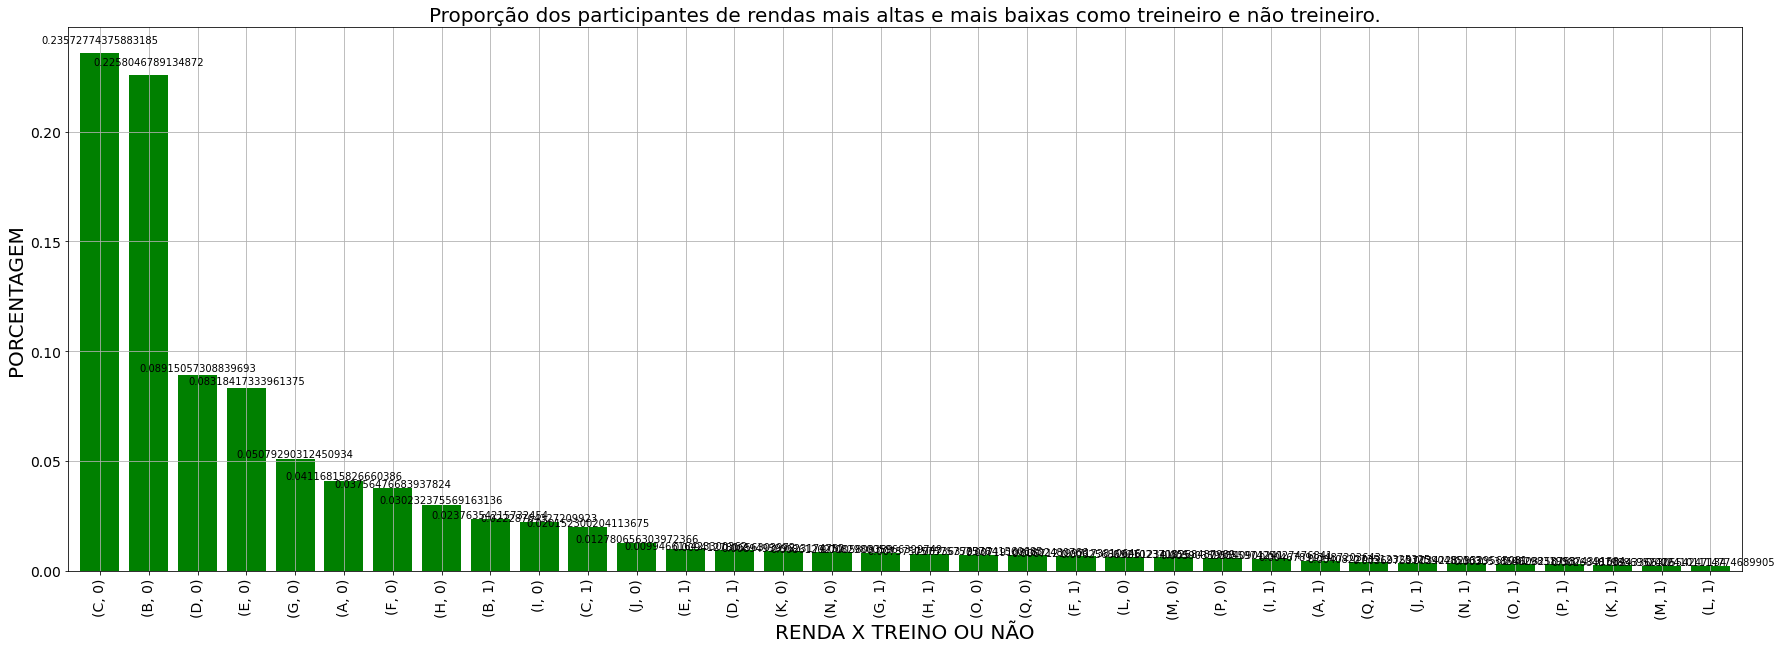

In [129]:
ax = treino_renda.plot.bar(grid = True, stacked = True, width = 0.8,color = "green", figsize = (30,10), fontsize = 14, legend = False)

ax.set_xlabel('RENDA X TREINO OU NÃO', size = 20)
ax.set_ylabel('PORCENTAGEM', size = 20)
plt.title('Proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.', size = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(height, (x + width/2, y + height*1.02), ha='center', fontsize= 10)

In [130]:
#len(treino_renda_frame[0])
#len(treino_renda_frame)
#treino_renda_frame.shape
treino_renda_frame.columns

Index(['total', 'IN_TREINEIRO', 0], dtype='object')

Text(0.5, 1.0, 'Treineiros X Renda')

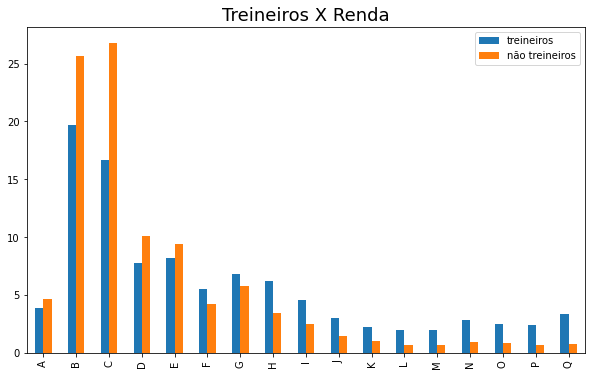

In [131]:
treineiros = dados.query('IN_TREINEIRO==1')['Q006'].value_counts(normalize=True).mul(100).sort_index()
nao_treineiros = dados.query('IN_TREINEIRO==0')['Q006'].value_counts(normalize=True).mul(100).sort_index()

df = pd.DataFrame({'treineiros':treineiros, 'não treineiros': nao_treineiros})
ax = df.plot.bar(figsize=(10,6))
ax.set_title('Treineiros X Renda', fontsize=18)

##Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

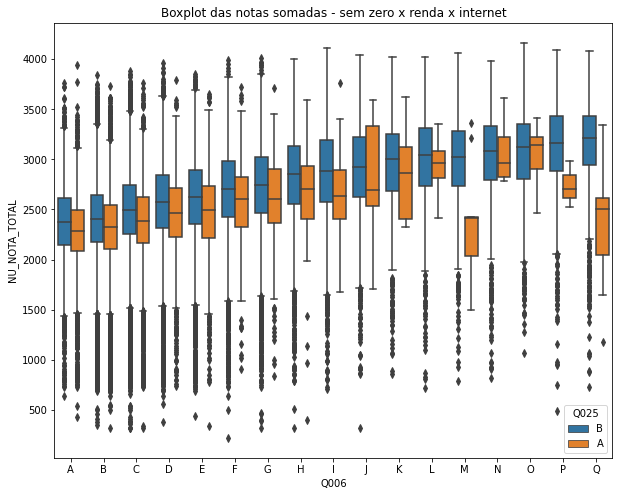

In [132]:
fn_boxplot("Q006", "NU_NOTA_TOTAL",dados_sem_nota_zero,"Q025",renda_ordenada,"Boxplot das notas somadas - sem zero x renda x internet" )

#A - Não 
#B - Sim 


Text(0.5, 1.0, 'Internet X Renda')

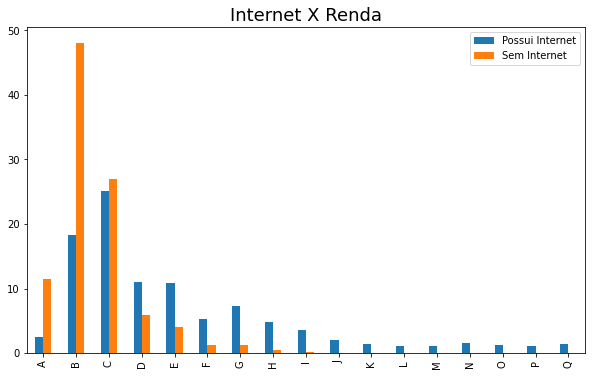

In [133]:
com_internet = dados.query("Q025=='B'")['Q006'].value_counts(normalize=True).mul(100).sort_index()
sem_internet = dados.query("Q025=='A'")['Q006'].value_counts(normalize=True).mul(100).sort_index()

df = pd.DataFrame({'Possui Internet':com_internet, 'Sem Internet': sem_internet})
ax = df.plot.bar(figsize=(10,6))
ax.set_title('Internet X Renda', fontsize=18)

#Aula 3 - Distribuições e Correlações

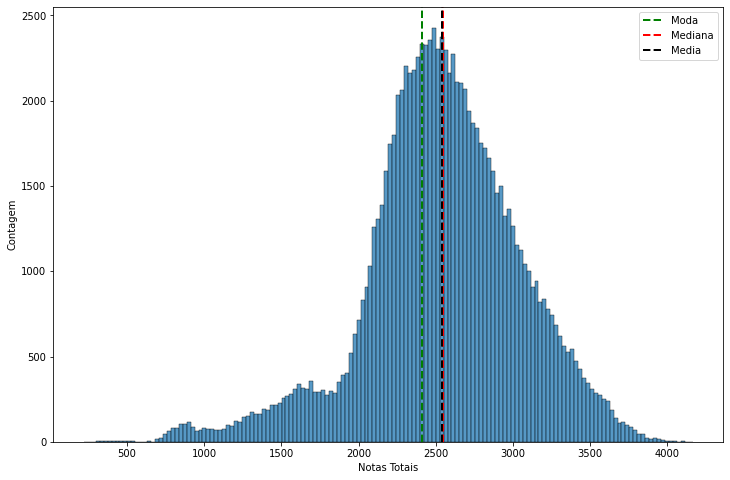

In [134]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL")

plt.axvline(dados_sem_nota_zero['NU_NOTA_TOTAL'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(dados_sem_nota_zero['NU_NOTA_TOTAL'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(dados_sem_nota_zero['NU_NOTA_TOTAL'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')

plt.ylabel('Contagem')
plt.xlabel('Notas Totais')
plt.legend()

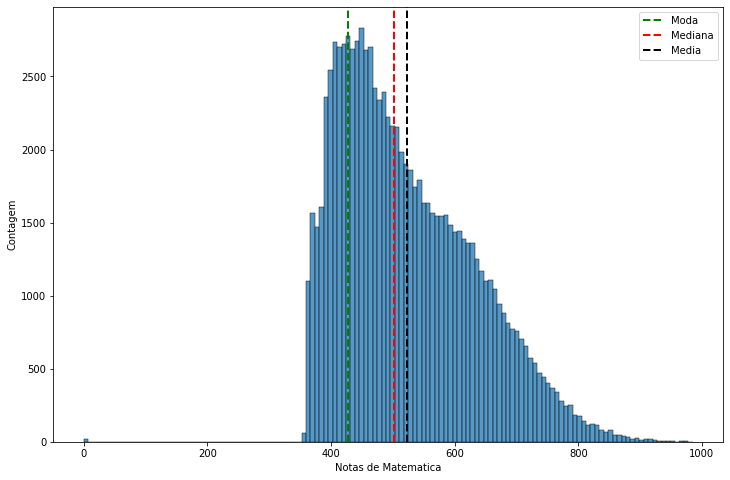

In [135]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT")
plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')
plt.ylabel('Contagem')
plt.xlabel('Notas de Matematica')
plt.legend()

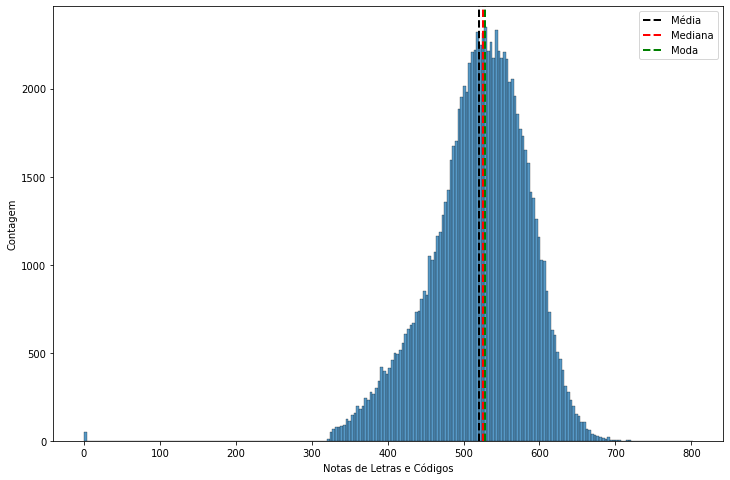

In [136]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC")


plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].mean(), color='black', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')

plt.ylabel('Contagem')
plt.xlabel('Notas de Letras e Códigos')
plt.legend()

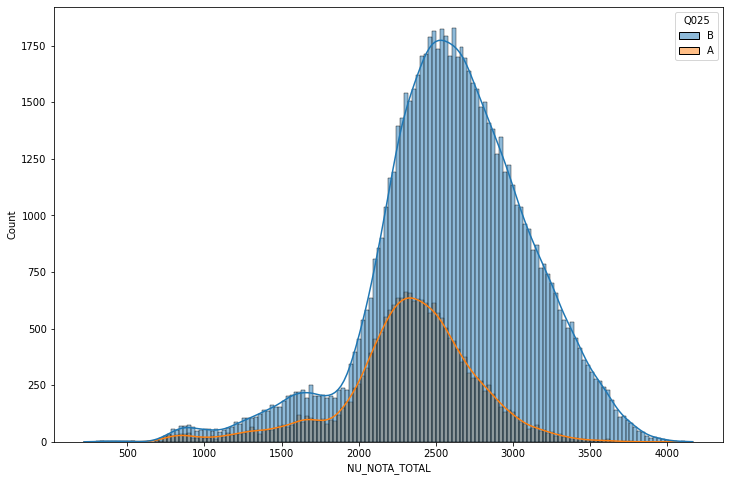

In [137]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde = True)

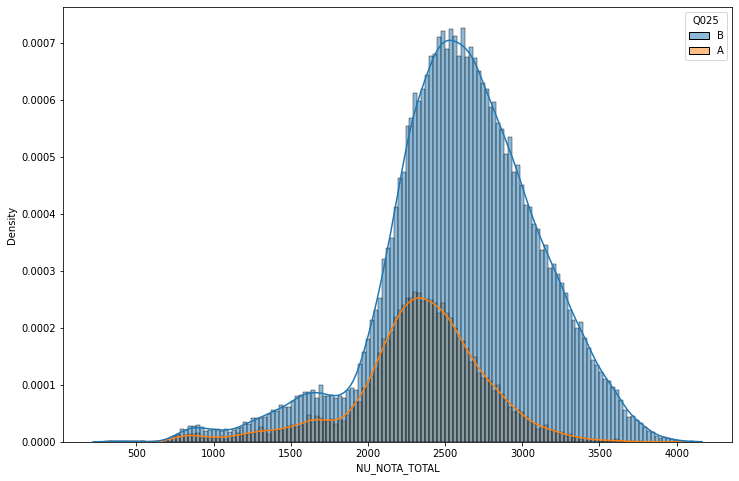

In [138]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde = True, stat = "density")

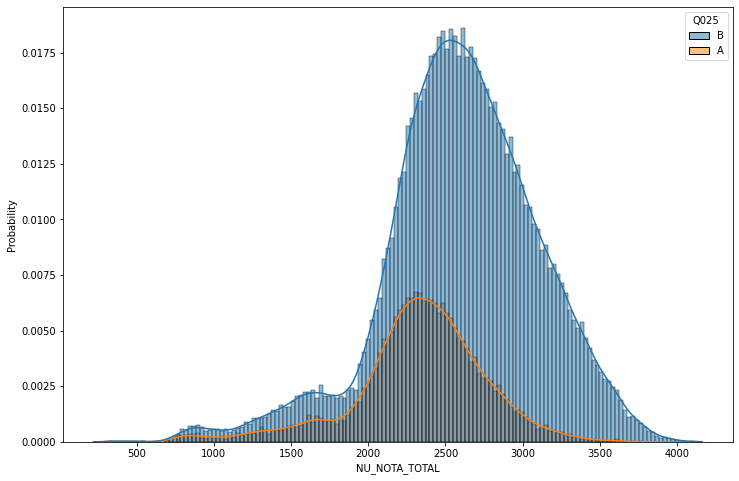

In [139]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde = True, stat = "probability")

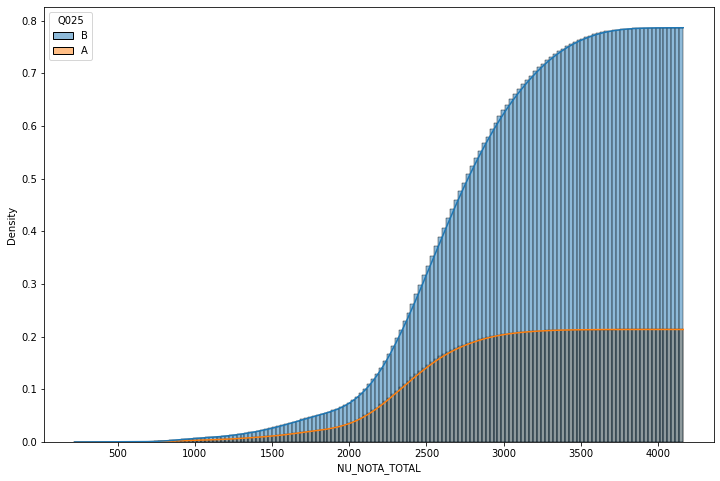

In [140]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue = "Q025", kde = True, stat = "density", cumulative=True)

(-50.0, 1050.0)

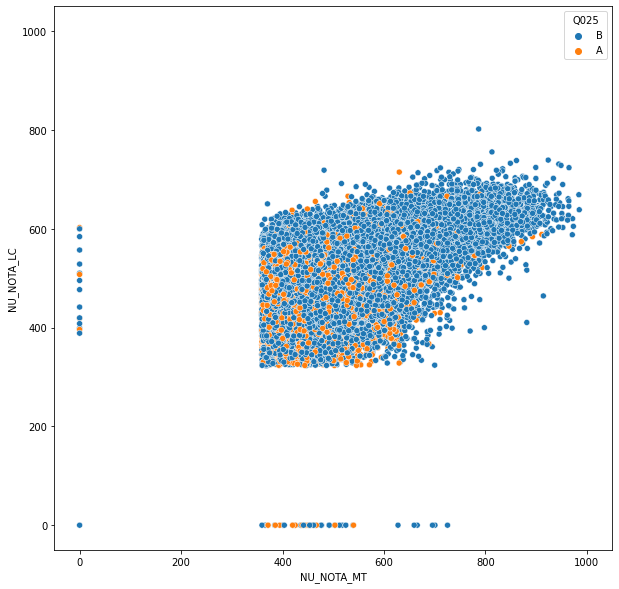

In [141]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_nota_zero, x= "NU_NOTA_MT", y = "NU_NOTA_LC", hue="Q025")

#sns.scatterplot(data = dados_sem_nota_zero, x= "NU_NOTA_MT", y = "NU_NOTA_LC")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [142]:
dados_sem_nota_zero

NU_INSCRICAO  NU_ANO  ...  Q025 NU_NOTA_TOTAL
0       190001004661    2019  ...     B        2288.9
1       190001004674    2019  ...     B        1184.6
2       190001004722    2019  ...     B        2350.5
3       190001004735    2019  ...     B        2555.7
4       190001004776    2019  ...     B        2803.5
...              ...     ...  ...   ...           ...
127375  190006120035    2019  ...     B        2867.4
127376  190006120036    2019  ...     B        2218.5
127377  190006120037    2019  ...     B        1453.9
127378  190006120060    2019  ...     A        2573.9
127379  190006120170    2019  ...     B        2287.8

[98218 rows x 137 columns]

In [143]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_MT    NU_NOTA_LC  NU_NOTA_REDACAO
count  92758.000000  98043.000000  92758.000000  98043.000000     98043.000000
mean     477.964015    507.365912    523.555206    520.463928       571.570025
std       76.296099     82.972839    109.416939     64.556578       188.076455
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      418.000000    447.900000    435.300000    483.700000       480.000000
50%      470.200000    510.900000    501.600000    526.100000       580.000000
75%      533.300000    567.100000    598.200000    565.100000       680.000000
max      797.300000    809.400000    985.000000    801.700000      1000.000000

In [144]:
provas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

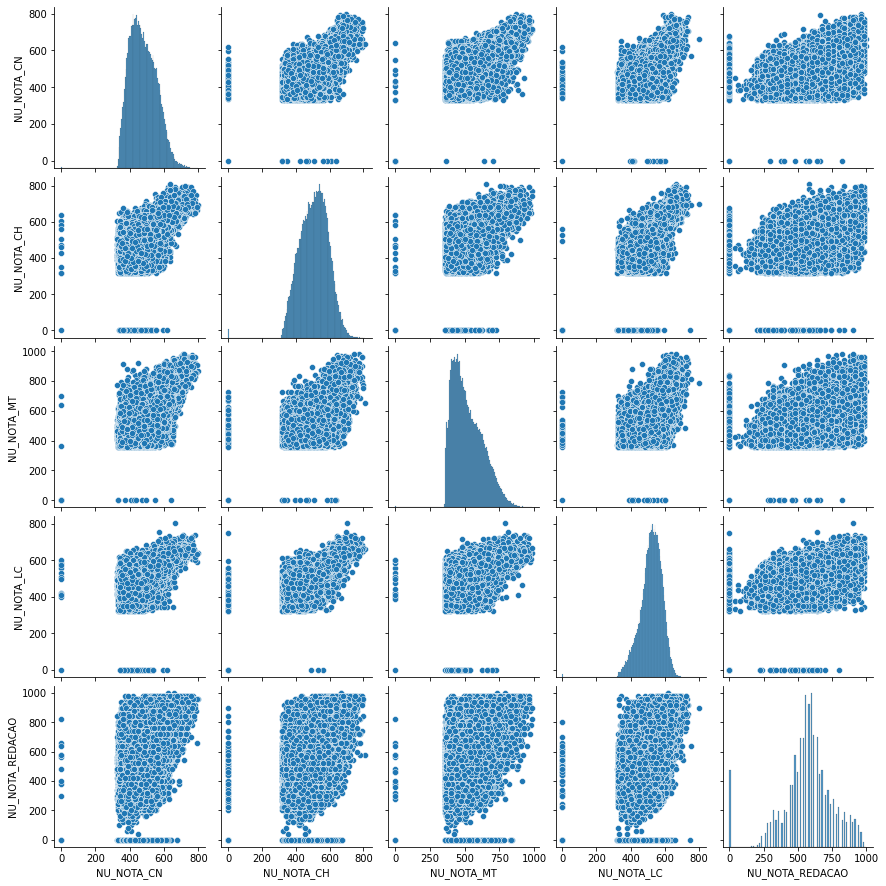

In [145]:
sns.pairplot(dados_sem_nota_zero[provas])

In [146]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

NU_NOTA_CN  NU_NOTA_CH  ...  NU_NOTA_LC  NU_NOTA_REDACAO
NU_NOTA_CN         1.000000    0.668979  ...    0.641624         0.504740
NU_NOTA_CH         0.668979    1.000000  ...    0.744170         0.528338
NU_NOTA_MT         0.649527    0.610332  ...    0.587710         0.493046
NU_NOTA_LC         0.641624    0.744170  ...    1.000000         0.535797
NU_NOTA_REDACAO    0.504740    0.528338  ...    0.535797         1.000000

[5 rows x 5 columns]

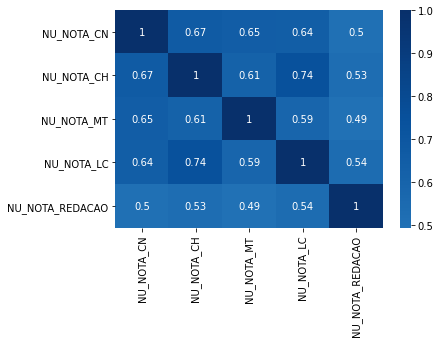

In [147]:
sns.heatmap(correlacao, cmap= "Blues", center = 0, annot= True)

#Aula 3 - Desafios

Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

##Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

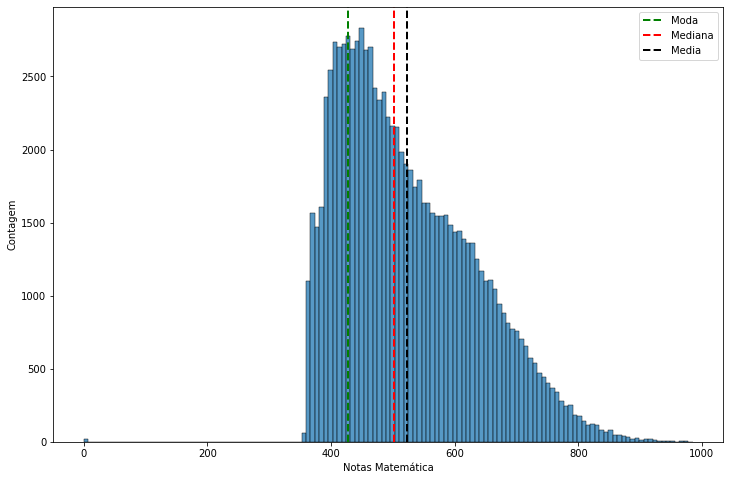

In [148]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT")

plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(dados_sem_nota_zero['NU_NOTA_MT'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')

plt.ylabel('Contagem')
plt.xlabel('Notas Matemática')
plt.legend()

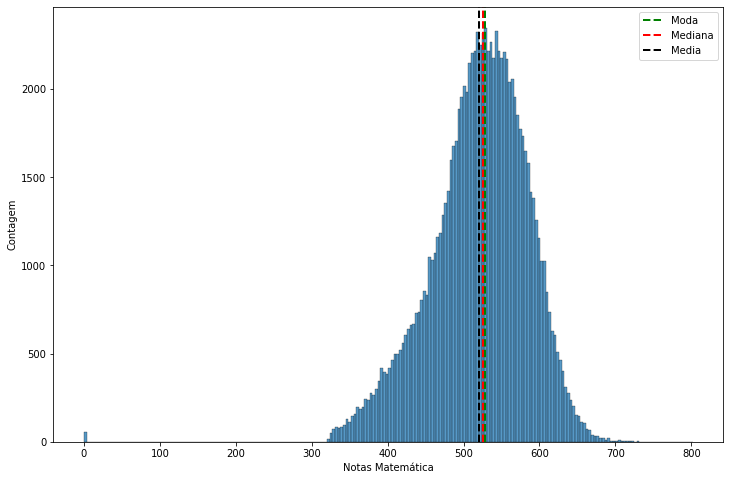

In [149]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC")

plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(dados_sem_nota_zero['NU_NOTA_LC'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')

plt.ylabel('Contagem')
plt.xlabel('Notas Matemática')
plt.legend()

In [150]:
#1
figura = make_subplots(rows = 1, cols = 2, 
                    subplot_titles = ('das Notas de Matemática', 
                                      'das Notas de Linguagens e Códigos'))

figura.add_trace(go.Histogram(x = dados_sem_nota_zero['NU_NOTA_MT'], name = 'Notas Matemática', showlegend=False,
                           marker_color = 'blue'), row = 1, col = 1)
figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_MT'].median(), dados_sem_nota_zero['NU_NOTA_MT'].median()],
                            y=[0,2000],
                            mode="lines",
                            legendgroup="Mediana",
                            showlegend=True,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="red"
                                       ),
                            name="Mediana"
                            ), row = 1, col = 1,)

figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_MT'].mean(), dados_sem_nota_zero['NU_NOTA_MT'].mean()],
                            y=[0,2000],
                            mode="lines",
                            legendgroup="Média",
                            showlegend=True,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="black"
                                       ),
                            name="Média"
                            ), row = 1, col = 1,)

figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_MT'].mode()[0], dados_sem_nota_zero['NU_NOTA_MT'].mode()[0]],
                            y=[0,2000],
                            mode="lines",
                            legendgroup="Moda",
                            showlegend=True,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="green"
                                       ),
                            name="Moda"
                            ), row = 1, col = 1,)

#2

figura.add_trace(go.Histogram(x = dados_sem_nota_zero['NU_NOTA_LC'], name = 'Notas LC', showlegend=False,
                           marker_color = 'blue'), row = 1, col = 2)

figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_LC'].median(), dados_sem_nota_zero['NU_NOTA_LC'].median()],
                            y=[0,1400],
                            mode="lines",
                            legendgroup="Mediana",
                            showlegend=False,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="red"
                                       ),
                            name="Mediana"
                            ), row = 1, col = 2,)

figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_LC'].mean(), dados_sem_nota_zero['NU_NOTA_LC'].mean()],
                            y=[0,1400],
                            mode="lines",
                            legendgroup="Média",
                            showlegend=False,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="black",
                                       ),
                            name="Média"
                            ), row = 1, col = 2,)

figura.add_trace(go.Scatter(x=[dados_sem_nota_zero['NU_NOTA_LC'].mode()[0], dados_sem_nota_zero['NU_NOTA_LC'].mode()[0]],
                            y=[0,1400],
                            mode="lines",
                            legendgroup="Moda",
                            showlegend=False,
                            marker=dict(size=12,
                                       line=dict(width=0.8),
                                       color="green"
                                       ),
                            name="Moda"
                            ), row = 1, col = 2)

figura.update_xaxes(title_text='Notas')

figura.update_yaxes(title_text='Quantidade')

figura.update_layout(
    title_text = 'Distribuição',
    template = 'plotly_white',
    bargap = .05,
)

figura.show()

#Gráfico abaixo não aparece no GitHub


## Desafio 2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.


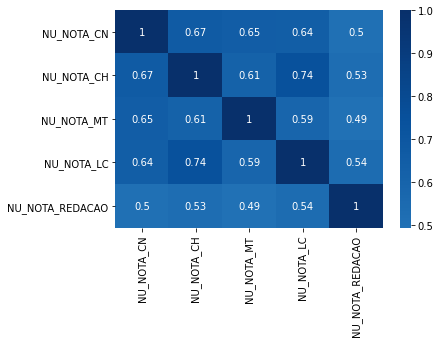

In [151]:
sns.heatmap(correlacao, cmap= "Blues", center = 0, annot= True)

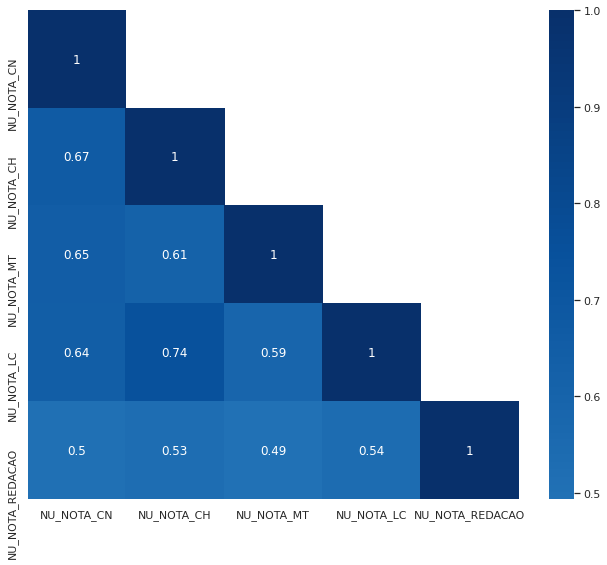

In [152]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0,
           annot=True)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafio 3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.


In [153]:
dados_sem_nota_zero['SG_UF_RESIDENCIA'].value_counts(normalize=True)*100

SP    15.870818
MG    10.658942
BA     7.839704
RJ     6.642367
CE     5.876723
PA     5.651714
PE     5.609970
MA     4.405506
RS     4.202896
PR     4.086827
GO     3.320165
PB     3.051376
PI     2.487324
RN     2.378383
SC     2.117738
ES     1.960944
AM     1.956871
DF     1.840803
AL     1.811277
MT     1.682991
SE     1.498707
MS     1.233990
RO     1.043597
TO     0.931601
AP     0.814515
AC     0.742226
RR     0.282026
Name: SG_UF_RESIDENCIA, dtype: float64

In [154]:
sp_dados_sem_nota_zero = dados_sem_nota_zero.query("SG_UF_RESIDENCIA == 'SP'")

In [155]:
sp_dados_sem_nota_zero
print('Total de {} alunos sem nota zero em SP:'.format(sp_dados_sem_nota_zero.shape[0]))
print('Em porcentagem : {:.2f} % do total'.format(sp_dados_sem_nota_zero.shape[0]/dados_sem_nota_zero.shape[0]*100))

Total de 15588 alunos sem nota zero em SP:
Em porcentagem : 15.87 % do total


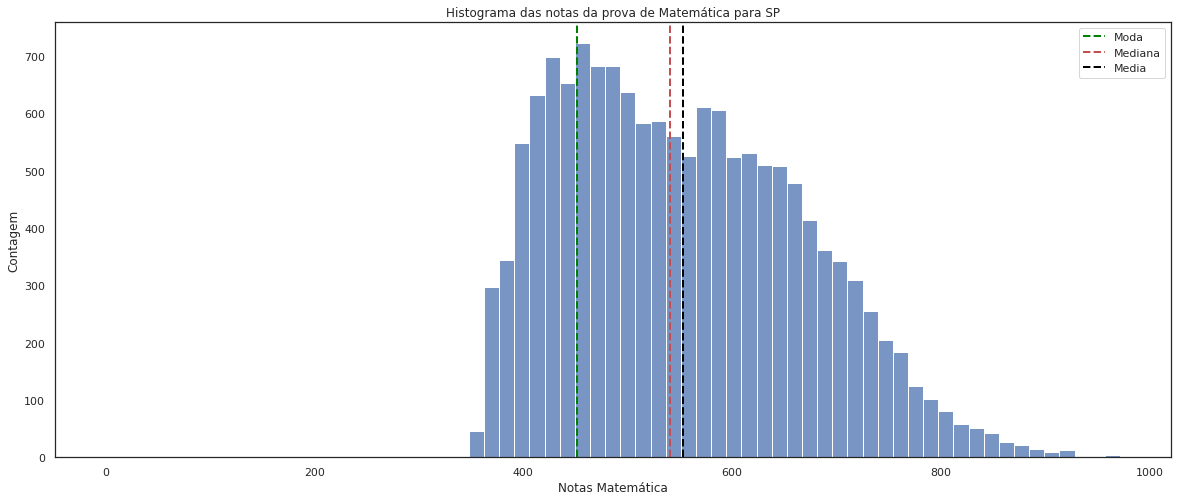

In [156]:
plt.figure(figsize=(20,8))

sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_MT")

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')

plt.title('Histograma das notas da prova de Matemática para SP')

plt.ylabel('Contagem')
plt.xlabel('Notas Matemática')
plt.legend()

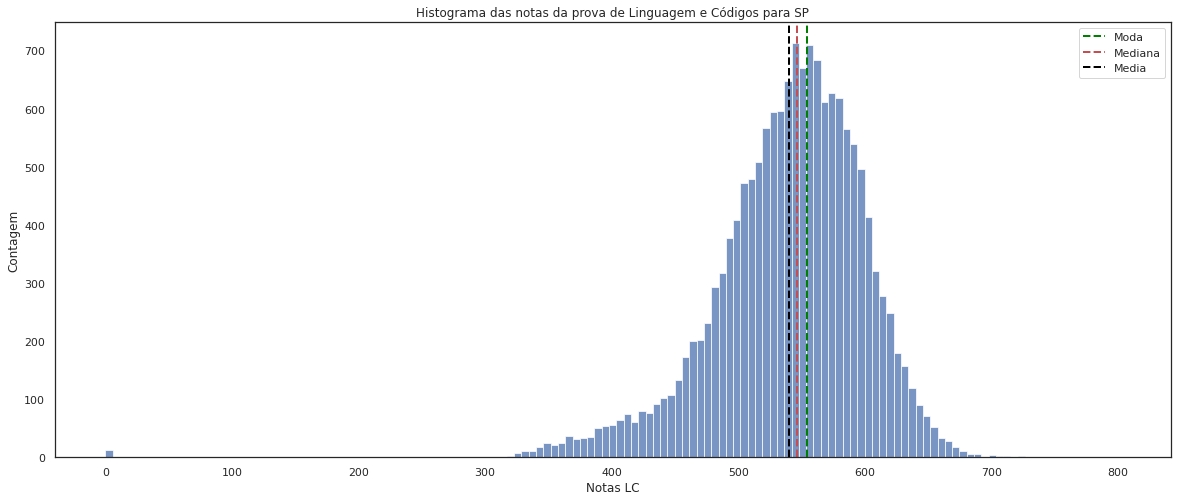

In [157]:
plt.figure(figsize=(20,8))

sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_LC")

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')

plt.title('Histograma das notas da prova de Linguagem e Códigos para SP')

plt.ylabel('Contagem')
plt.xlabel('Notas LC')
plt.legend()

In [158]:
mode_NU_NOTA_LC = sp_dados_sem_nota_zero['NU_NOTA_LC'].mode()
median_NU_NOTA_LC = sp_dados_sem_nota_zero['NU_NOTA_LC'].median()
mean_NU_NOTA_LC = sp_dados_sem_nota_zero['NU_NOTA_LC'].mean()


In [159]:
mode_NU_NOTA_LC[0]

554.4

In [160]:
median_NU_NOTA_LC

546.2

In [161]:
mean_NU_NOTA_LC

540.024002569868

In [162]:
mode_NU_NOTA_MT = sp_dados_sem_nota_zero['NU_NOTA_MT'].mode()
median_NU_NOTA_MT = sp_dados_sem_nota_zero['NU_NOTA_MT'].median()
mean_NU_NOTA_MT = sp_dados_sem_nota_zero['NU_NOTA_MT'].mean()


In [163]:
print(mode_NU_NOTA_MT[0], median_NU_NOTA_MT,mean_NU_NOTA_MT )

451.3 541.1 553.4052105443348


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f8cc4a9b710> has a label of '_' which cannot be automatically added to the legend.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7f8cc48972b0> has a label of '_' which cannot be automatically added to the legend.



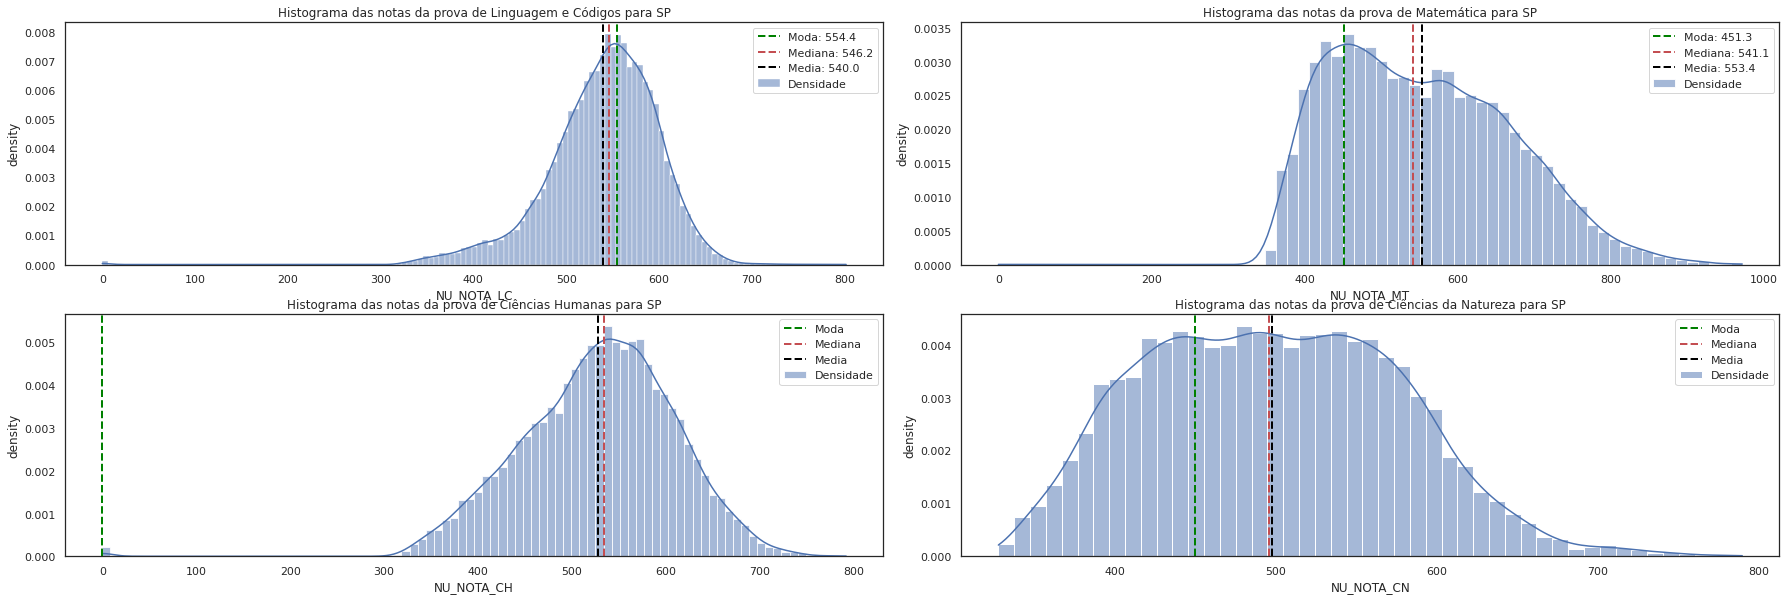

In [164]:
plt.figure(figsize=(25,8))

plt.subplot(2,2,1)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_LC", stat="density", kde=True, label='densidade')

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_LC'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')
plt.title('Histograma das notas da prova de Linguagem e Códigos para SP')
plt.ylabel('density')
plt.xlabel('NU_NOTA_LC')
plt.legend(  ["_", f"Moda: {mode_NU_NOTA_LC[0]}",f"Mediana: {median_NU_NOTA_LC}",f"Media: {round(mean_NU_NOTA_LC,1)}","Densidade"] )
#melhor usar o outro método add_trace(go.Scatter


plt.subplot(2,2,2)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_MT", stat="density", kde=True, label='Densidade')

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_MT'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')
plt.title('Histograma das notas da prova de Matemática para SP')
plt.ylabel('density')
plt.xlabel('NU_NOTA_MT')
plt.legend(  ["_", f"Moda: {mode_NU_NOTA_MT[0]}",f"Mediana: {median_NU_NOTA_MT}",f"Media: {round(mean_NU_NOTA_MT,1)}","Densidade"] )



plt.tight_layout()

plt.subplot(2,2,3)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_CH", stat="density", kde=True, label='Densidade')

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CH'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CH'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CH'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')
plt.title('Histograma das notas da prova de Ciências Humanas para SP')
plt.ylabel('density')
plt.xlabel('NU_NOTA_CH')
plt.legend()


plt.subplot(2,2,4)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_CN", stat="density", kde=True, label='Densidade')

plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CN'].mode()[0], color='green', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CN'].median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(sp_dados_sem_nota_zero['NU_NOTA_CN'].mean(), color='black', linestyle='dashed', linewidth=2, label='Media')
plt.title('Histograma das notas da prova de Ciências da Natureza para SP')
plt.ylabel('density')
plt.xlabel('NU_NOTA_CN')
plt.legend()





Text(0.5, 1.0, 'Histograma da nota total dos alunos de SP  X acesso a internet (A- Não/ B- Sim)')

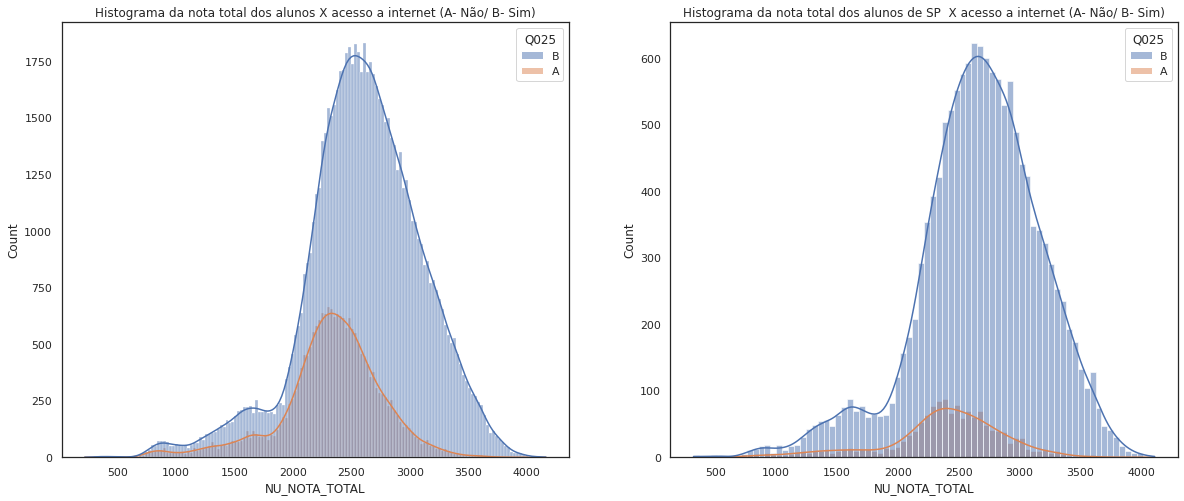

In [165]:
#NÚMEROS TOTAIS
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.title('Histograma da nota total dos alunos X acesso a internet (A- Não/ B- Sim)')

plt.subplot(1,2,2)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.title('Histograma da nota total dos alunos de SP  X acesso a internet (A- Não/ B- Sim)')


Text(0.5, 1.0, 'Histograma da nota total dos alunos de SP  X acesso a internet (A- Não/ B- Sim)')

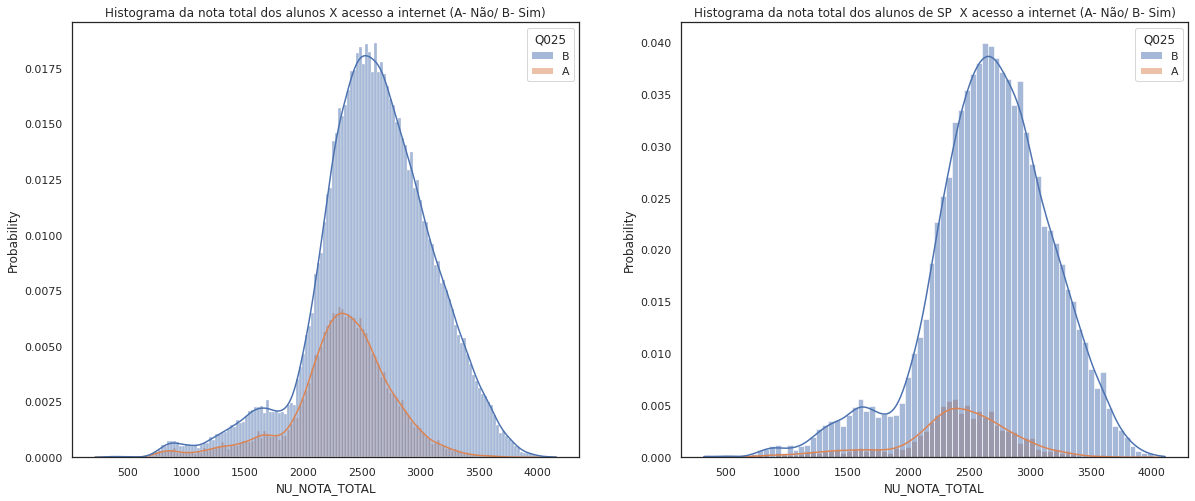

In [166]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")
plt.title('Histograma da nota total dos alunos X acesso a internet (A- Não/ B- Sim)')

plt.subplot(1,2,2)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")
plt.title('Histograma da nota total dos alunos de SP  X acesso a internet (A- Não/ B- Sim)')

(0.0, 0.9)

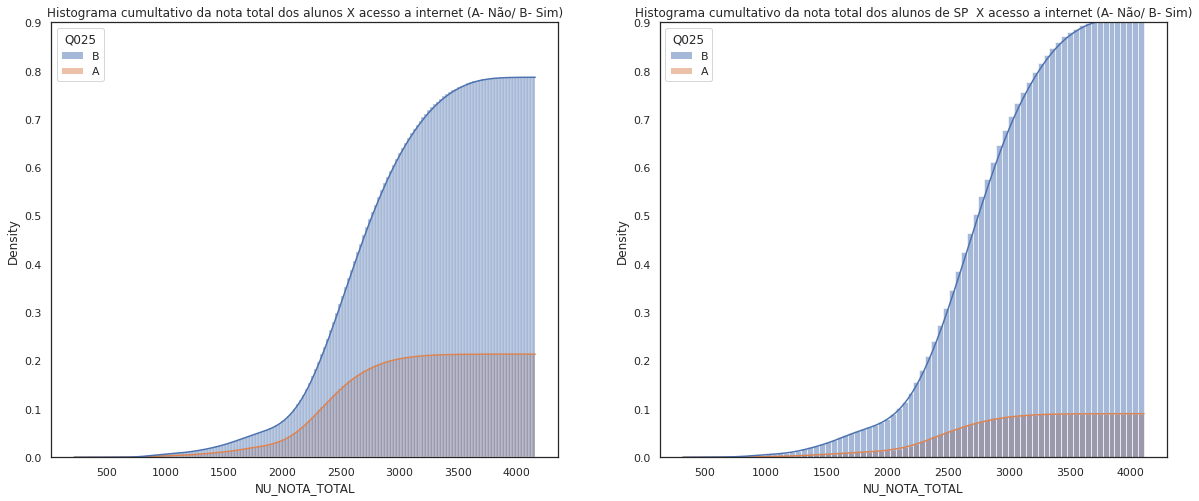

In [167]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
plt.title('Histograma cumultativo da nota total dos alunos X acesso a internet (A- Não/ B- Sim)')

plt.ylim(0,0.9)


plt.subplot(1,2,2)
sns.histplot(sp_dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
plt.title('Histograma cumultativo da nota total dos alunos de SP  X acesso a internet (A- Não/ B- Sim)')


plt.ylim(0,0.9)

(-50.0, 1050.0)

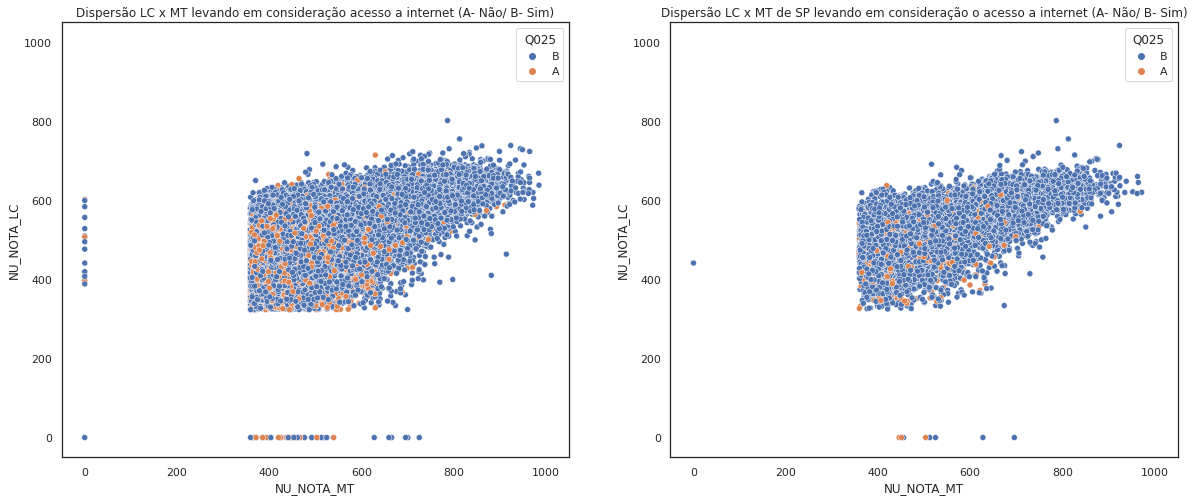

In [168]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.title('Dispersão LC x MT levando em consideração acesso a internet (A- Não/ B- Sim)')
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))


plt.subplot(1,2,2)
sns.scatterplot(data = sp_dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.title('Dispersão LC x MT de SP levando em consideração o acesso a internet (A- Não/ B- Sim)')
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

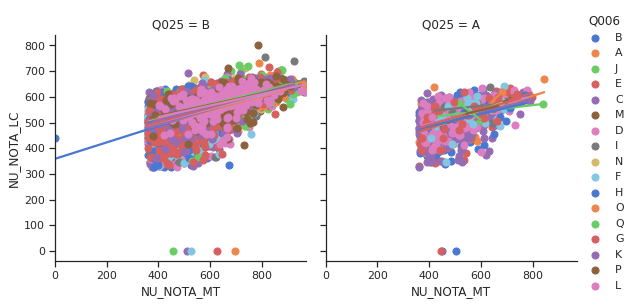

In [169]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_LC", col="Q025", hue="Q006", data=sp_dados_sem_nota_zero, 
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})





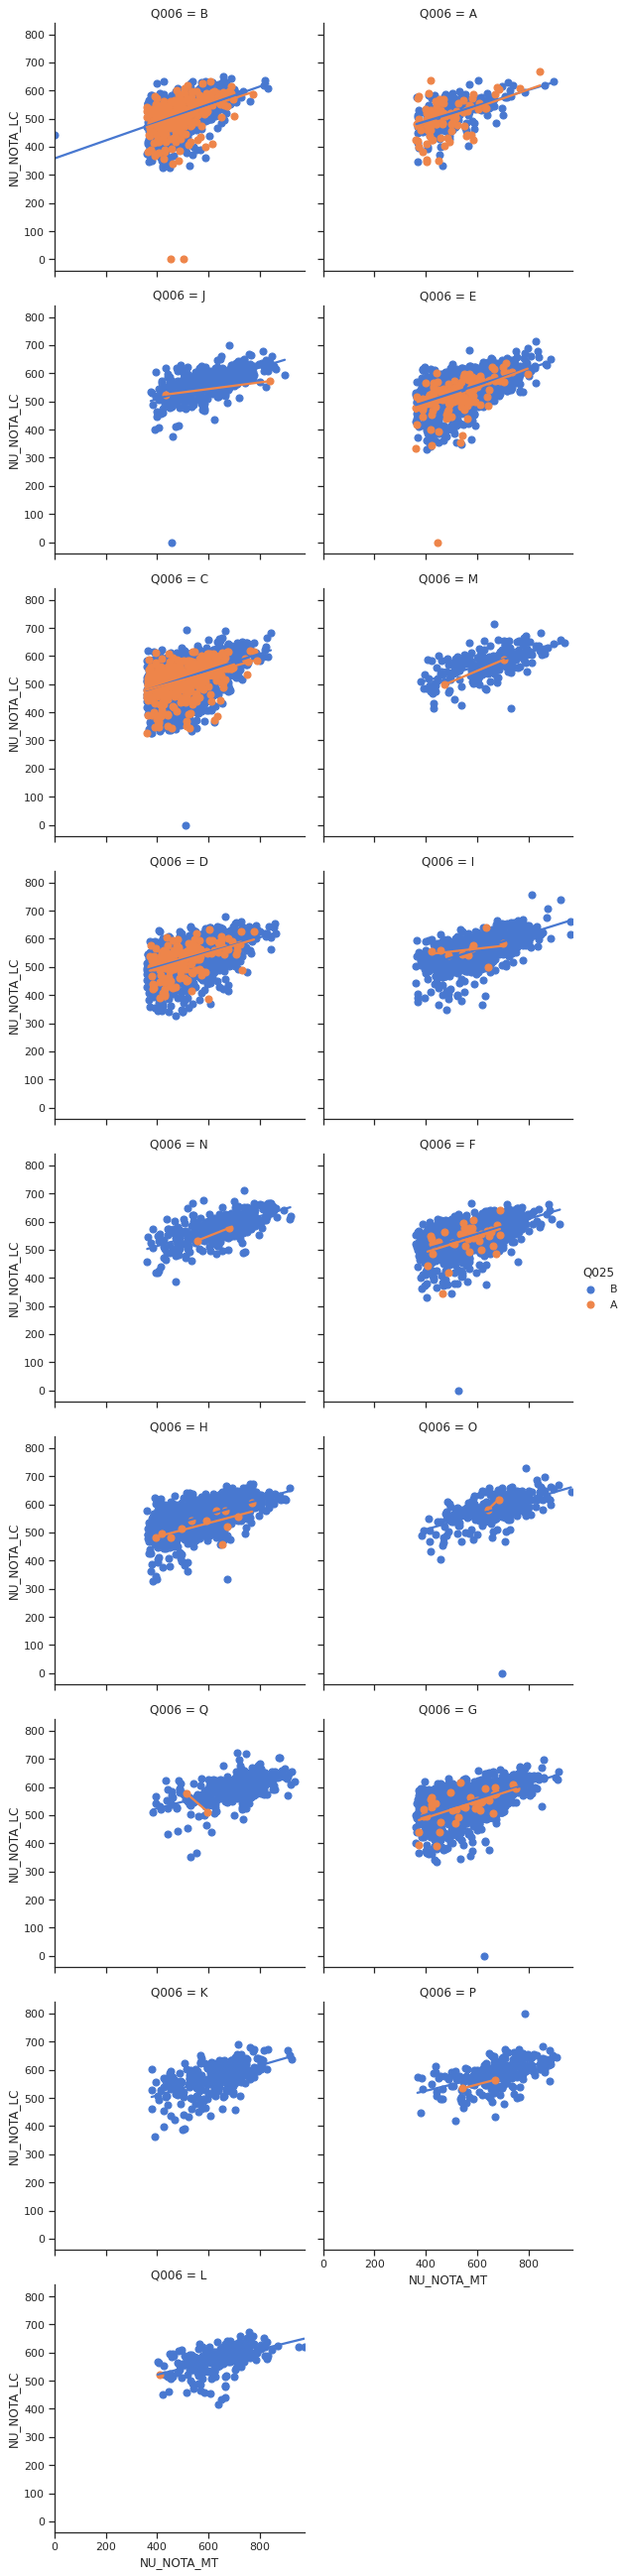

In [170]:
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_LC", col="Q006", hue="Q025", data=sp_dados_sem_nota_zero, 
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

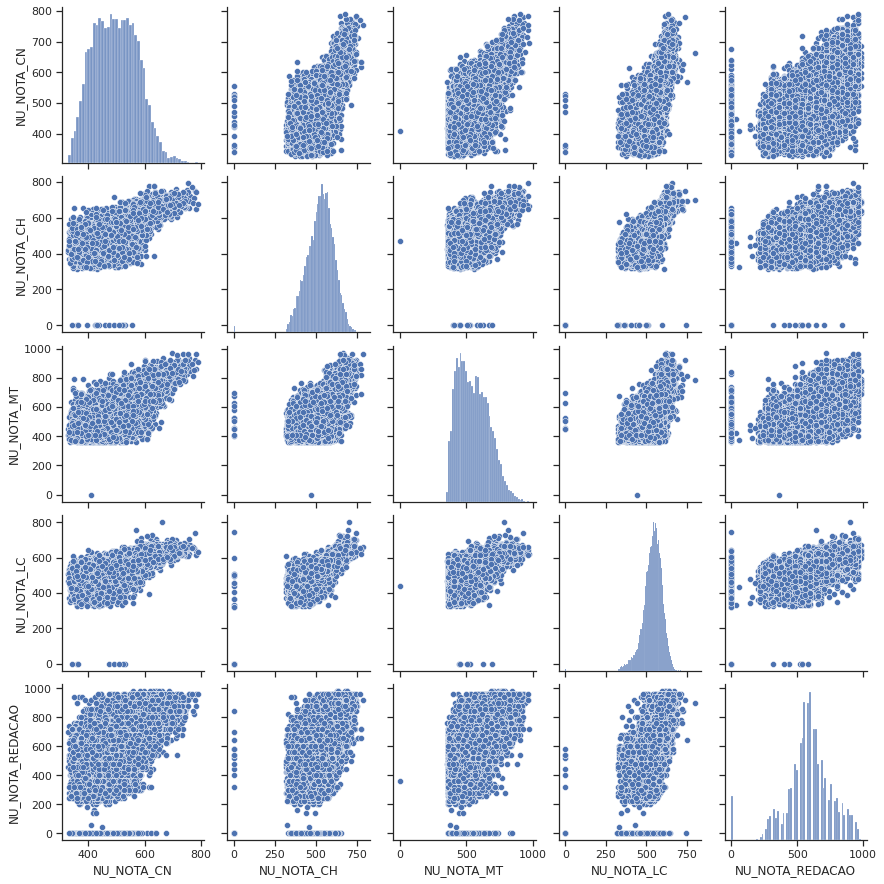

In [171]:
sns.pairplot(sp_dados_sem_nota_zero[provas])

In [172]:
correlacao_sp = sp_dados_sem_nota_zero[provas].corr()
correlacao_sp

NU_NOTA_CN  NU_NOTA_CH  ...  NU_NOTA_LC  NU_NOTA_REDACAO
NU_NOTA_CN         1.000000    0.688268  ...    0.652432         0.541327
NU_NOTA_CH         0.688268    1.000000  ...    0.758839         0.558145
NU_NOTA_MT         0.686403    0.621622  ...    0.598929         0.517547
NU_NOTA_LC         0.652432    0.758839  ...    1.000000         0.560184
NU_NOTA_REDACAO    0.541327    0.558145  ...    0.560184         1.000000

[5 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



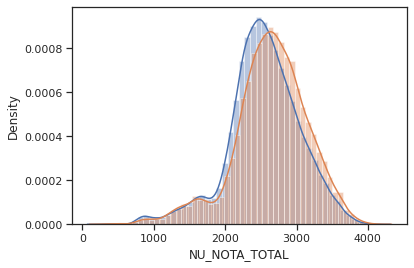

In [173]:
sns.distplot(dados_sem_nota_zero['NU_NOTA_TOTAL'])
sns.distplot(sp_dados_sem_nota_zero['NU_NOTA_TOTAL'])

In [174]:
#Outra forma
correlaca_provas = dados_sem_nota_zero[provas].corr()
correlaca_provas_sp = dados_sem_nota_zero[dados_sem_nota_zero['SG_UF_RESIDENCIA'] == 'SP'][provas].corr()
figura_correlacao = make_subplots(rows = 1, cols = 2,
                         subplot_titles = ('Brasil', 'São Paulo'),
                         shared_yaxes = True)


figura_correlacao.add_trace(go.Heatmap(
                   z=correlaca_provas,
                   x=['Ciências Naturais', 'Ciências Humanas', 'Matemática', 'Linguagens e Códigos', 'Redação'],
                   y=['Ciências Naturais', 'Ciências Humanas', 'Matemática', 'Linguagens e Códigos', 'Redação'],
                   colorscale = 'BuPu',
                   showscale=False,
                   xgap=1, ygap=1,
                   colorbar_thickness=20,
                   colorbar_ticklen=3,
                   hoverongaps = False),row = 1, col = 1)


figura_correlacao.add_trace(go.Heatmap(
                   z=correlaca_provas_sp,
                   x=['Ciências Naturais', 'Ciências Humanas', 'Matemática', 'Linguagens e Códigos', 'Redação'],
                   y=['Ciências Naturais', 'Ciências Humanas', 'Matemática', 'Linguagens e Códigos', 'Redação'],
                   colorscale = 'BuPu',
                   xgap = 1, ygap = 1,
                   colorbar_thickness=20,
                   colorbar_ticklen=3,
                   hoverongaps = False),row = 1, col = 2)

figura_correlacao.update_layout(
    title_text = 'Correlação - Notas das Provas',
    template = 'plotly_white',
)

figura_correlacao.show()

#O gráfico abaixo não aparece no GitHub

Text(0.5, 1.0, 'Mapa de calor - notas dos alunos de SP')

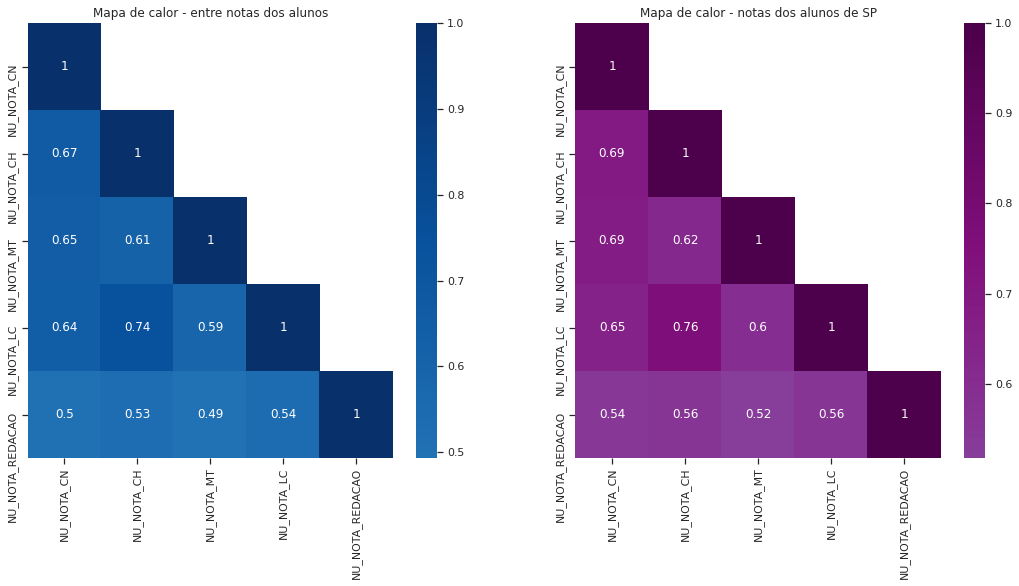

In [175]:
mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask_sp = np.triu(np.ones_like(correlacao_sp, dtype=bool), k=1)

cmap_sp = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)

sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0,
            annot=True)
plt.title('Mapa de calor - entre notas dos alunos')

plt.subplot(1,2,2)

sns.heatmap(correlacao_sp, mask=mask_sp, cmap="BuPu", center=0,
            annot=True)
plt.title('Mapa de calor - notas dos alunos de SP')

## Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

1.   O aluno que vai bem em uma normalmente vai bem na outra
2.   Números de SP se assemelham ao Brasil




#Aula 4 - Machine Learning

In [176]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]


In [177]:
notas_entrada

NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
0            512.3       488.6       435.6            420.0
2            499.1       441.0       423.2            560.0
3            578.1       551.5       426.2            500.0
4            571.3       511.2       516.5            780.0
5            618.7       607.5       559.6            900.0
...            ...         ...         ...              ...
127373       501.5       485.3       480.4            520.0
127375       559.6       525.7       502.4            740.0
127376       380.9       450.3       449.1            520.0
127378       416.2       517.3       564.7            620.0
127379       425.5       477.1       466.7            480.0

[92537 rows x 4 columns]

In [178]:
notas_saida

0         432.4
2         427.2
3         499.9
4         424.5
5         615.6
          ...  
127373    386.7
127375    539.7
127376    418.2
127378    455.7
127379    438.5
Name: NU_NOTA_MT, Length: 92537, dtype: float64

In [179]:
x = notas_entrada
y = notas_saida

In [180]:
notas_entrada

NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
0            512.3       488.6       435.6            420.0
2            499.1       441.0       423.2            560.0
3            578.1       551.5       426.2            500.0
4            571.3       511.2       516.5            780.0
5            618.7       607.5       559.6            900.0
...            ...         ...         ...              ...
127373       501.5       485.3       480.4            520.0
127375       559.6       525.7       502.4            740.0
127376       380.9       450.3       449.1            520.0
127378       416.2       517.3       564.7            620.0
127379       425.5       477.1       466.7            480.0

[92537 rows x 4 columns]

In [181]:
seed = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25, random_state = 4321)

In [182]:
x_treino.head()

NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
90200        567.7       523.2       542.7            660.0
12375        497.1       423.0       445.2            580.0
46320        494.0       528.5       454.0            520.0
111208       561.9       572.7       385.8            640.0
75943        686.5       646.5       625.7            900.0

In [183]:
x_treino.shape

(69402, 4)

In [184]:
len(x_treino)

69402

In [185]:
y_treino.shape

(69402,)

In [186]:
len(y_treino)

69402

In [187]:
len(x_teste)

23135

In [188]:
len(y_teste)

23135

In [189]:
modelo = LinearSVR(random_state = seed)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [190]:
predicoes_matematica = modelo.predict(x_teste)

In [191]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

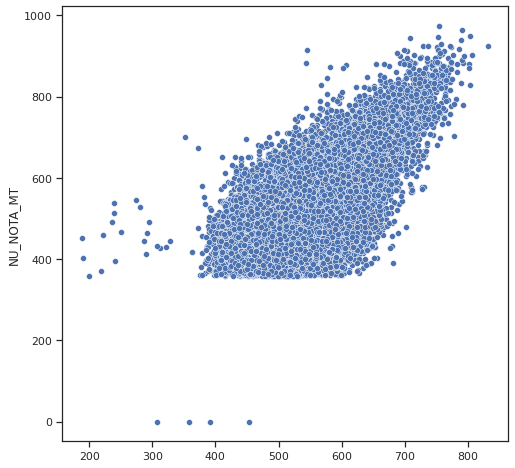

In [192]:
plt.figure(figsize=(8,8))
sns.scatterplot (x=predicoes_matematica, y = y_teste)
#plt.xlim((-50, 1050))
#plt.ylim((-50, 1050))

#y_teste = notas verdadeiras
#predicoes_matematica = precicoes de matematica

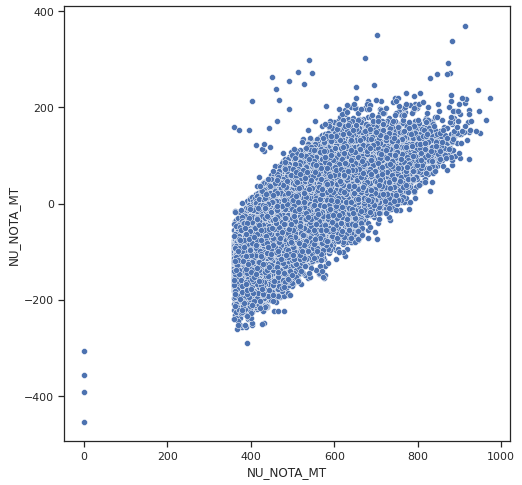

In [193]:
#Em aula
plt.figure(figsize=(8,8))
sns.scatterplot (x=y_teste, y = y_teste-predicoes_matematica)
#plt.xlim((-50, 1050))
#plt.ylim((-50, 1050))


--Comentário

No grafico o eixo y é a diferenca entre o valor REAL e a PREDICAO: y_teste - predicoes_matematicas. Um valor y positivo significa que o valor real é MAIOR que a predicao. Um valor y negativo significa que o valor real é MENOR que a predicao. 
Como para as pessoas com nota  mais baixa o valor em y é positivo, isso significa que para essas pessoas a predicao é mais BAIXA. Que é o que foi falado em aula.


Faz sentido sim, porém para as pessoas com nota mais baixa, o y é negativo. Daí nossa conclusão fica invertida.
Nesse gráfico abaixo foi invertida a fórmula para ficar mais claro o entendimento. Por isso o Y é positivo para quem tirou notas mais baixas.
Mas ficou confuso, pois como fica quem tirou nota alta?


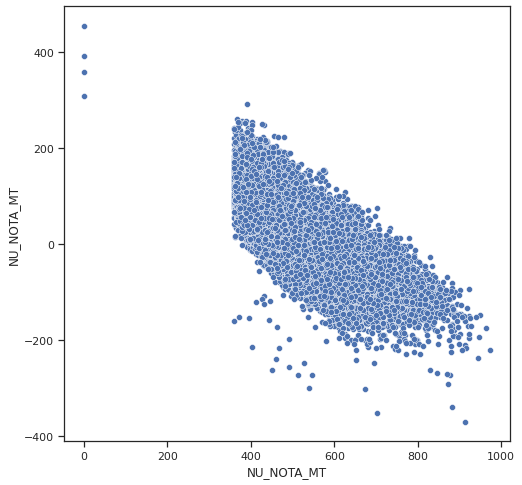

In [194]:
#Possivel correção
plt.figure(figsize=(8,8))
sns.scatterplot (x=y_teste, y = predicoes_matematica - y_teste)

--Voltando para aula

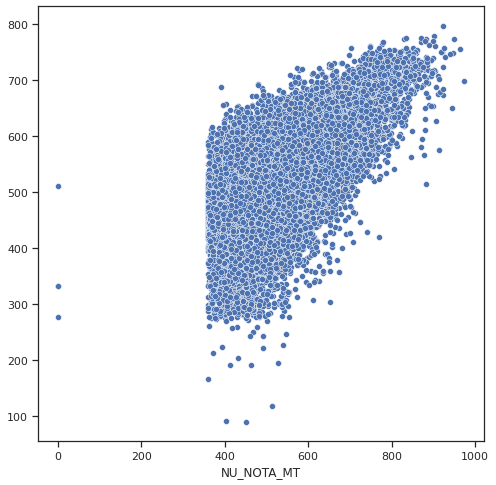

In [195]:
#Comparando com a media
plt.figure(figsize=(8,8))
sns.scatterplot (x=y_teste, y = x_teste.mean(axis=1))

In [196]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [197]:
resultados

Real    Previsao   diferenca  quadrado_diferenca
114991  459.7  564.486105 -104.786105        10980.127878
104685  617.2  628.305027  -11.105027          123.321625
91028   520.0  509.980986   10.019014          100.380650
115802  703.8  593.681144  110.118856        12126.162420
93303   627.1  579.784588   47.315412         2238.748252
...       ...         ...         ...                 ...
81393   688.6  626.291851   62.308149         3882.305380
40159   479.1  652.313922 -173.213922        30003.062777
64083   501.4  607.787172 -106.387172        11318.230438
84661   772.5  734.227663   38.272337         1464.771772
79106   369.0  466.919690  -97.919690         9588.265665

[23135 rows x 4 columns]

In [198]:
resultados["quadrado_diferenca"].mean()

6604.415306219529

In [199]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435341

In [200]:


modelo_dummy = DummyRegressor()

modelo_dummy.fit(x_treino, y_treino)

dummy_predicoes = modelo_dummy.predict(x_teste)


In [201]:
mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [202]:
mean_squared_error(y_teste, predicoes_matematica)

6604.41530621957

#Aula 4 - Desafios

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão

## Desafio 1: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

1.   DecisionTreeRegressor




In [215]:
modelo_tree = tree.DecisionTreeRegressor(max_depth = 3)
modelo_tree.fit(x_treino, y_treino)
tree_predicoes = modelo_tree.predict(x_teste)
mean_squared_error(y_teste, tree_predicoes) 

6027.166905272975

In [216]:
resultadosdt = pd.DataFrame()
resultadosdt["Real"] = y_teste
resultadosdt["Previsao"]= tree_predicoes
resultadosdt["Diferenca"] = resultadosdt["Real"] - resultadosdt["Previsao"]
resultadosdt["Quadrado_diferenca"] = (resultadosdt["Real"] - resultadosdt["Previsao"])**2
resultadosdt

Real    Previsao   Diferenca  Quadrado_diferenca
114991  459.7  498.209624  -38.509624         1482.991154
104685  617.2  574.706169   42.493831         1805.725713
91028   520.0  459.158256   60.841744         3701.717860
115802  703.8  574.706169  129.093831        16665.217323
93303   627.1  521.542330  105.557670        11142.421615
...       ...         ...         ...                 ...
81393   688.6  637.451897   51.148103         2616.128465
40159   479.1  637.451897 -158.351897        25075.323208
64083   501.4  574.706169  -73.306169         5373.794345
84661   772.5  776.991198   -4.491198           20.170860
79106   369.0  459.158256  -90.158256         8128.511055

[23135 rows x 4 columns]

2.   KNeighborsRegressor



In [217]:
modelo_neigh = KNeighborsRegressor()
modelo_neigh.fit(x_treino, y_treino)
neigh_predicoes = modelo_neigh.predict(x_teste)
mean_squared_error(y_teste, neigh_predicoes)

6432.6058905554355

In [218]:
resultadosnn = pd.DataFrame()
resultadosnn["Real"] = y_teste
resultadosnn["Previsao"]= neigh_predicoes
resultadosnn["Diferenca"] = resultadosdt["Real"] - resultadosdt["Previsao"]
resultadosnn["Quadrado_diferenca"] = (resultadosdt["Real"] - resultadosdt["Previsao"])**2
resultadosnn

Real  Previsao   Diferenca  Quadrado_diferenca
114991  459.7    465.70  -38.509624         1482.991154
104685  617.2    621.74   42.493831         1805.725713
91028   520.0    495.72   60.841744         3701.717860
115802  703.8    506.04  129.093831        16665.217323
93303   627.1    521.90  105.557670        11142.421615
...       ...       ...         ...                 ...
81393   688.6    554.86   51.148103         2616.128465
40159   479.1    651.82 -158.351897        25075.323208
64083   501.4    604.88  -73.306169         5373.794345
84661   772.5    797.60   -4.491198           20.170860
79106   369.0    455.00  -90.158256         8128.511055

[23135 rows x 4 columns]

Text(0.5, 0.98, 'Comparando os modelos')

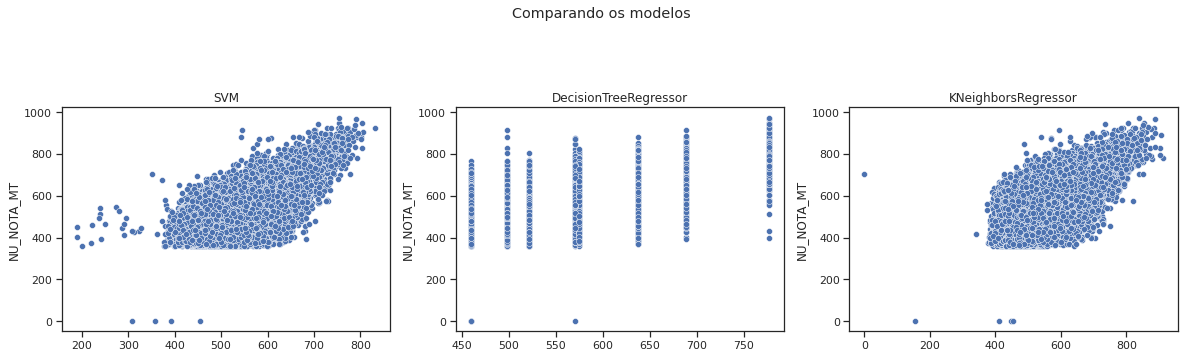

In [219]:
plt.figure(figsize=(20,14))

#SVM com seed
plt.subplot(3,3,1)
sns.scatterplot(x= predicoes_matematica, y = y_teste)
plt.title("SVM")

#DecisionTreeRegressor
plt.subplot(3,3,2)
sns.scatterplot(x=tree_predicoes, y = y_teste)
plt.title("DecisionTreeRegressor")

#KNeighborsRegressor
plt.subplot(3,3,3)
sns.scatterplot(x= neigh_predicoes, y = y_teste)
plt.title("KNeighborsRegressor")

plt.suptitle("Comparando os modelos")

## Desafio 2: Ler a documentação do Dummy e alterar o método de regressão


In [220]:
modelo_dummy_mean = DummyRegressor(strategy="mean")
modelo_dummy_mean.fit(x_treino, y_treino)
dummy_predicoes_mean = modelo_dummy_mean.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_mean)

12063.645588509502

In [221]:
modelo_dummy_median = DummyRegressor(strategy="median")
modelo_dummy_median.fit(x_treino, y_treino)
dummy_predicoes_median = modelo_dummy_median.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_median) 

12599.969971795981

In [222]:
#desafio 2, dummy strategy =quantile - 0(minimo)
modelo_dummy_quantile_minimo = DummyRegressor(strategy="quantile", quantile = 0.0)
modelo_dummy_quantile_minimo.fit(x_treino, y_treino)
dummy_predicoes_quantile_minimo = modelo_dummy_quantile_minimo.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_quantile_minimo ) #287425.98995893664

287425.98995893664

In [223]:
#desafio 2, dummy strategy =quantile - 1(maximo)
modelo_dummy_quantile_maximo = DummyRegressor(strategy="quantile", quantile = 1.0)
modelo_dummy_quantile_maximo.fit(x_treino, y_treino)
dummy_predicoes_quantile_maximo = modelo_dummy_quantile_maximo.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_quantile_maximo ) #223890.15624378645

223890.15624378645

Text(0.5, 0.98, 'Comparando os metodos')

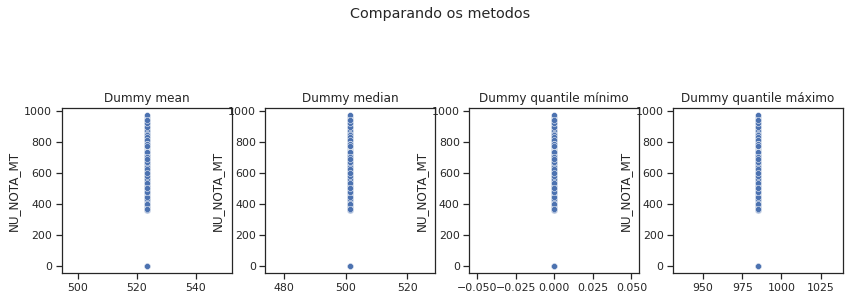

In [224]:
plt.figure(figsize=(14,14))

#mean
plt.subplot(4,4,1)
sns.scatterplot(x=dummy_predicoes_mean, y = y_teste)
plt.title("Dummy mean")

#median
plt.subplot(4,4,2)
sns.scatterplot(x= dummy_predicoes_median, y = y_teste)
plt.title("Dummy median")

#minimo
plt.subplot(4,4,3)
sns.scatterplot(x= dummy_predicoes_quantile_minimo, y = y_teste)
plt.title("Dummy quantile mínimo")

#maximo
plt.subplot(4,4,4)
sns.scatterplot(x= dummy_predicoes_quantile_maximo, y = y_teste)
plt.title("Dummy quantile máximo")


plt.suptitle("Comparando os metodos")

## Desafio 3: Buscar outra métrica para avaliar modelos de regressão

In [225]:
#Metricas para o SVM
m1 = skm.mean_absolute_error(y_teste, predicoes_matematica )
m2 = mean_squared_error(y_teste, predicoes_matematica)
m3 = skm.max_error(y_teste, predicoes_matematica)
m4 = skm.median_absolute_error(y_teste, predicoes_matematica )

#metricas Near neighbors
nn1 = skm.mean_absolute_error(y_teste, neigh_predicoes )
nn2 = mean_squared_error(y_teste, neigh_predicoes )
nn3 = skm.max_error(y_teste, neigh_predicoes )
nn4 = skm.median_absolute_error(y_teste, neigh_predicoes )

#metricas Decision tree
dt1 = skm.mean_absolute_error(y_teste, tree_predicoes )
dt2 = mean_squared_error(y_teste, tree_predicoes )
dt3 = skm.max_error(y_teste, tree_predicoes )
dt4 = skm.median_absolute_error(y_teste, tree_predicoes ) 

#metricas dummy
du1 = skm.mean_absolute_error(y_teste, dummy_predicoes )
du2 = mean_squared_error(y_teste,  dummy_predicoes )
du3 = skm.max_error(y_teste,  dummy_predicoes )
du4 = skm.median_absolute_error(y_teste,  dummy_predicoes )

metricas = {"Modelos":["SVM", "Near Neighbors", "Decision Tree", "Dummy"],"mean_absolute_error":[m1, nn1, dt1, du1]," mean_squared_error":[m2,nn2,dt2,du2], "max_error":[m3,nn3,dt3, du3], "median_absolute_error":[m4, nn4, dt4, du4]}
modelos_regressao = pd.DataFrame(data = metricas)
modelos_regressao


Modelos  mean_absolute_error  ...   max_error  median_absolute_error
0             SVM            66.045554  ...  453.506823              57.918485
1  Near Neighbors            63.782104  ...  701.600000              53.660000
2   Decision Tree            62.249913  ...  570.541049              53.657670
3           Dummy            90.387175  ...  523.339552              82.960448

[4 rows x 5 columns]

#Aula 5 - Validação de modelo

Comparando com e sem random state

In [226]:
modelo = LinearSVR(random_state = seed)
modelo.fit(x_treino, y_treino)

predicoes_matematica = modelo.predict(x_teste)

mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



6604.41530621957

In [227]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

predicoes_matematica = modelo.predict(x_teste)

mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



6750.5311823034735

In [228]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

predicoes_matematica = modelo.predict(x_teste)

mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



9954.130933729675

Tentar diminuir a aleatoriedade


Site Built-in magic commands: https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-precision



In [229]:
%precision

'%r'

In [230]:

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)

predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)


6027.166905272975

In [231]:


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)

predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)



6082.497605514336

tem que ser neg_mean_squared_error

In [232]:

modelo_arvore = DecisionTreeRegressor(max_depth= 2)
resultados = cross_validate(modelo_arvore, x, y, scoring = "neg_mean_squared_error")
resultados["test_score"]

array([-6317.91361711, -6390.69330384, -6519.97057993, -6702.12730215,
       -6851.82019408])

cv=10 - aumentar o cv para rodar outras opções


resultados = cross_validate(modelo_arvore, x, y, cv=10, scoring = "neg_mean_squared_error")


In [233]:
resultados["test_score"] * -1

array([6317.91361711, 6390.69330384, 6519.97057993, 6702.12730215,
       6851.82019408])

In [241]:
def calcula_mse(resultados):
  media = (resultados["test_score"]*-1).mean()
  desvio_padrao = (resultados["test_score"]*-1).std()
  limite_inferior = media - (2*desvio_padrao)
  limite_superior = media + (2*desvio_padrao)
  print(f"Media: {media} - Desvio Padrão: {desvio_padrao} - Intervalo de confiança: {limite_inferior} - {limite_superior}")

In [242]:
SEED = 1232
np.random.seed(SEED)

partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth= 3) # quanto maior a profundidade da arvore melhor o resultado 
resultados = cross_validate(modelo_arvore, x, y, cv = partes , scoring = "neg_mean_squared_error")
calcula_mse(resultados)


Media: 6054.767567442072 - Desvio Padrão: 98.01286252465634 - Intervalo de confiança: 5858.741842392759 - 6250.793292491384


In [244]:
def regressor_arvore(nivel):
  SEED = 1232
  np.random.seed(SEED)
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth= nivel) # quanto maior a profundidade da arvore melhor o resultado 
  resultados = cross_validate(modelo_arvore, x, y, cv = partes , scoring = "neg_mean_squared_error", return_train_score= True)
  print(f"Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()} ")


In [245]:
regressor_arvore(4)

Treino = 5760.834451245899 | Teste = 5815.707286597402 


In [246]:
for i in range(1,21):
  regressor_arvore(i)

Treino = 7844.952652412207 | Teste = 7857.871770206351 
Treino = 6527.783475408351 | Teste = 6556.886287657656 
Treino = 6021.275229419075 | Teste = 6054.767567442072 
Treino = 5760.834451245899 | Teste = 5815.707286597402 
Treino = 5598.158955426787 | Teste = 5675.196789060744 
Treino = 5469.677369145869 | Teste = 5593.304363812442 
Treino = 5369.458309852721 | Teste = 5541.646599457925 
Treino = 5276.16965707928 | Teste = 5542.053091078966 
Treino = 5166.713159932668 | Teste = 5608.390265709719 
Treino = 5022.598049115693 | Teste = 5761.4934268457555 
Treino = 4833.560706021637 | Teste = 5955.331403579403 
Treino = 4598.125022484774 | Teste = 6217.553668629227 
Treino = 4316.3791662866815 | Teste = 6521.403312280134 
Treino = 4000.6209880837496 | Teste = 6853.984106997142 
Treino = 3655.8197526274853 | Teste = 7224.863053512405 
Treino = 3295.832684540846 | Teste = 7636.168819779455 
Treino = 2931.7212612043877 | Teste = 8071.851486256819 
Treino = 2575.59534021339 | Teste = 8452.126

Os resultados vão dimunuindo e depois aumenta - não é bom, por isso vamos colocar o return_train_score= True.

Após a inclusão do return_train_score= True:

Os resultados de treino vão reduzindo, ou seja, os dados estão ficanco bom para o treino e não para teste. -> Pesquisar sobre Overfit


# Aula 5 - Desafios

Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá)

Desafio 02: Testar com outros parâmetros da árvore de decisão

Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Desafio 04: Pesquisar o que é o problema de underfit.

Desafio 05: Plotar um gráfico com test_score e train_test.



## Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá)




## Desafio 02: Testar com outros parâmetros da árvore de decisão


## Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn


## Desafio 04: Pesquisar o que é o problema de underfit.


## Desafio 05: Plotar um gráfico com test_score e train_test.